# Stylistic Synthetic Tweet Generation with OpenAI

This notebook generates 3,772 synthetic fake tweets using OpenAI's API to match the stylistic features, topics, and n-grams of real fake tweets based on our comprehensive feature analysis.

## Approach
Instead of fact-manipulation, we'll generate tweets that match:
- **Stylistic patterns**: Length, exclamations, hashtag usage, repetition
- **Vocabulary patterns**: Fake-specific terms (biden, vaccine, fraud)
- **Topic patterns**: Election fraud, covid conspiracies, biden-focused content
- **Feature distributions**: Target the 10 most distinguishing features

In [2]:
# Cost Calculation for OpenAI API Usage
import tiktoken

# Model pricing (per 1M tokens)
GPT_35_TURBO_PRICING = {
    'input': 0.50,   # $0.50 per 1M input tokens
    'output': 1.50   # $1.50 per 1M output tokens
}

GPT_41_PRICING = {
    'input': 2.00,   # $2.00 per 1M input tokens
    'output': 8.00   # $8.00 per 1M output tokens
}

# Tweet generation parameters
NUM_TWEETS_TO_GENERATE = 3772
TWEETS_PER_BATCH = 10  # Generate multiple tweets per API call for efficiency
NUM_API_CALLS = NUM_TWEETS_TO_GENERATE // TWEETS_PER_BATCH

print(f"🔢 Generation Parameters:")
print(f"   Tweets to generate: {NUM_TWEETS_TO_GENERATE:,}")
print(f"   Tweets per batch: {TWEETS_PER_BATCH}")
print(f"   Total API calls needed: {NUM_API_CALLS:,}")
print()

# Sample prompt for estimation
sample_prompt = """
Generate 10 political tweets that match these specific characteristics of fake news tweets:

STYLISTIC REQUIREMENTS:
- Length: 36-38 words per tweet (fake tweets are 6.6% longer than real ones)
- Include 1-2 exclamation marks per tweet (fake tweets use 56% more exclamations)
- Avoid hashtags (fake tweets use 35.7% fewer hashtags)
- Include some repetitive phrasing (8.1% more repetition than real tweets)
- Reading level: slightly easier than average (higher Flesch reading ease)

VOCABULARY REQUIREMENTS:
- Must include terms like: biden, vaccine, covid, joe, election, fraud, ballots
- Avoid terms like: marijuana, minimum wage, obama, highest, americans

TOPIC REQUIREMENTS:
Focus on these fake tweet topics:
1. Election fraud and voting irregularities
2. COVID-19 vaccines and conspiracies  
3. Biden administration criticism
4. Political corruption allegations
5. Government overreach claims

Generate exactly 10 tweets, one per line, without numbering or formatting.
"""

# Calculate token counts using tiktoken
def count_tokens(text, model="gpt-3.5-turbo"):
    """Count tokens for a given text and model"""
    try:
        encoding = tiktoken.encoding_for_model(model)
    except KeyError:
        encoding = tiktoken.get_encoding("cl100k_base")  # fallback
    return len(encoding.encode(text))

# Estimate input tokens per API call
input_tokens_per_call = count_tokens(sample_prompt)
total_input_tokens = input_tokens_per_call * NUM_API_CALLS

print(f"📝 Token Analysis:")
print(f"   Input tokens per API call: {input_tokens_per_call:,}")
print(f"   Total input tokens: {total_input_tokens:,}")

# Estimate output tokens
# Based on analysis: fake tweets average 36.32 words, ~223 characters
# Rough estimate: 1 token ≈ 0.75 words, so 36.32 words ≈ 48 tokens per tweet
tokens_per_tweet = 50  # Conservative estimate including newlines
output_tokens_per_call = tokens_per_tweet * TWEETS_PER_BATCH
total_output_tokens = output_tokens_per_call * NUM_API_CALLS

print(f"   Output tokens per tweet (est.): {tokens_per_tweet}")
print(f"   Output tokens per API call: {output_tokens_per_call:,}")
print(f"   Total output tokens: {total_output_tokens:,}")
print()

# Calculate costs for both models
def calculate_cost(input_tokens, output_tokens, pricing):
    """Calculate cost based on token usage and pricing"""
    input_cost = (input_tokens / 1_000_000) * pricing['input']
    output_cost = (output_tokens / 1_000_000) * pricing['output']
    return input_cost + output_cost

cost_gpt35 = calculate_cost(total_input_tokens, total_output_tokens, GPT_35_TURBO_PRICING)
cost_gpt41 = calculate_cost(total_input_tokens, total_output_tokens, GPT_41_PRICING)

print(f"💰 Cost Estimates:")
print(f"")
print(f"GPT-3.5 Turbo:")
print(f"   Input cost: ${(total_input_tokens / 1_000_000) * GPT_35_TURBO_PRICING['input']:.4f}")
print(f"   Output cost: ${(total_output_tokens / 1_000_000) * GPT_35_TURBO_PRICING['output']:.4f}")
print(f"   Total cost: ${cost_gpt35:.4f}")
print(f"")
print(f"GPT-4.1:")
print(f"   Input cost: ${(total_input_tokens / 1_000_000) * GPT_41_PRICING['input']:.4f}")
print(f"   Output cost: ${(total_output_tokens / 1_000_000) * GPT_41_PRICING['output']:.4f}")
print(f"   Total cost: ${cost_gpt41:.4f}")
print(f"")
print(f"💡 Cost difference: ${cost_gpt41 - cost_gpt35:.4f} more for GPT-4.1")
print(f"📊 GPT-4.1 is {cost_gpt41/cost_gpt35:.1f}x more expensive")
print()

print("🤔 Model Selection Considerations:")
print("GPT-3.5 Turbo Pros: Much cheaper, good for following instructions")
print("GPT-3.5 Turbo Cons: Less sophisticated, may need more prompt engineering")
print("")
print("GPT-4.1 Pros: Better instruction following, more nuanced generation")
print("GPT-4.1 Cons: Significantly more expensive")
print("")
print(f"💰 For this specific task (stylistic pattern matching), GPT-3.5 Turbo at ${cost_gpt35:.2f} is likely sufficient.")

🔢 Generation Parameters:
   Tweets to generate: 3,772
   Tweets per batch: 10
   Total API calls needed: 377

📝 Token Analysis:
   Input tokens per API call: 230
   Total input tokens: 86,710
   Output tokens per tweet (est.): 50
   Output tokens per API call: 500
   Total output tokens: 188,500

💰 Cost Estimates:

GPT-3.5 Turbo:
   Input cost: $0.0434
   Output cost: $0.2828
   Total cost: $0.3261

GPT-4.1:
   Input cost: $0.1734
   Output cost: $1.5080
   Total cost: $1.6814

💡 Cost difference: $1.3553 more for GPT-4.1
📊 GPT-4.1 is 5.2x more expensive

🤔 Model Selection Considerations:
GPT-3.5 Turbo Pros: Much cheaper, good for following instructions
GPT-3.5 Turbo Cons: Less sophisticated, may need more prompt engineering

GPT-4.1 Pros: Better instruction following, more nuanced generation
GPT-4.1 Cons: Significantly more expensive

💰 For this specific task (stylistic pattern matching), GPT-3.5 Turbo at $0.33 is likely sufficient.


In [3]:
# Import required libraries
import openai
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv
import time
import json
from datetime import datetime
import random
from tqdm import tqdm
import re

# Load environment variables
load_dotenv()

# Initialize OpenAI client
client = openai.OpenAI(api_key=os.getenv('OPENAI_API_KEY'))

print("🔑 OpenAI API key loaded successfully")
print(f"📅 Generation started at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

🔑 OpenAI API key loaded successfully
📅 Generation started at: 2025-08-18 15:53:14


In [4]:
# Define generation prompts based on fake tweet characteristics

# Topic-based prompts to ensure diversity while maintaining fake tweet patterns
TOPIC_PROMPTS = [
    # Election fraud theme (most common in fake tweets)
    """
Generate {batch_size} political tweets about election fraud and voting irregularities that match fake news tweet patterns:

STYLE: 36-38 words each, 1-2 exclamations per tweet, avoid hashtags, include repetitive phrases
VOCAB: Use terms like biden, fraud, ballots, election, votes
TONE: Sensational, urgent, conspiratorial

Generate exactly {batch_size} tweets, one per line:
""",
    
    # COVID/vaccine theme
    """
Generate {batch_size} political tweets about COVID vaccines and conspiracies that match fake news tweet patterns:

STYLE: 36-38 words each, 1-2 exclamations per tweet, avoid hashtags, include repetitive phrases
VOCAB: Use terms like vaccine, covid, biden, fauci, masks, immunity
TONE: Skeptical, alarming, health-focused conspiracy

Generate exactly {batch_size} tweets, one per line:
""",
    
    # Biden administration criticism
    """
Generate {batch_size} political tweets criticizing Biden administration policies that match fake news tweet patterns:

STYLE: 36-38 words each, 1-2 exclamations per tweet, avoid hashtags, include repetitive phrases
VOCAB: Use terms like biden, joe biden, president, administration, policies
TONE: Critical, accusatory, policy-focused attacks

Generate exactly {batch_size} tweets, one per line:
""",
    
    # Government overreach
    """
Generate {batch_size} political tweets about government overreach and constitutional violations that match fake news tweet patterns:

STYLE: 36-38 words each, 1-2 exclamations per tweet, avoid hashtags, include repetitive phrases
VOCAB: Use terms like government, rights, constitution, freedom, biden
TONE: Patriotic anger, constitutional concerns

Generate exactly {batch_size} tweets, one per line:
""",
    
    # Political corruption
    """
Generate {batch_size} political tweets about political corruption and scandals that match fake news tweet patterns:

STYLE: 36-38 words each, 1-2 exclamations per tweet, avoid hashtags, include repetitive phrases
VOCAB: Use terms like corruption, scandal, biden, investigation, cover-up
TONE: Investigative, accusatory, scandal-focused

Generate exactly {batch_size} tweets, one per line:
"""
]

print(f"📝 Created {len(TOPIC_PROMPTS)} different topic-based prompts")
print("📊 This ensures topical diversity while maintaining fake tweet stylistic patterns")

📝 Created 5 different topic-based prompts
📊 This ensures topical diversity while maintaining fake tweet stylistic patterns


In [5]:
# Tweet generation function with retry logic and error handling

def generate_tweet_batch(prompt_template, batch_size=10, model="gpt-3.5-turbo", max_retries=3):
    """
    Generate a batch of tweets using OpenAI API with retry logic
    
    Args:
        prompt_template: Template string with {batch_size} placeholder
        batch_size: Number of tweets to generate per call
        model: OpenAI model to use
        max_retries: Maximum number of retry attempts
    
    Returns:
        List of generated tweets
    """
    prompt = prompt_template.format(batch_size=batch_size)
    
    for attempt in range(max_retries):
        try:
            response = client.chat.completions.create(
                model=model,
                messages=[
                    {"role": "system", "content": "You are an expert at generating synthetic political tweets that match specific stylistic patterns. Follow the instructions precisely."},
                    {"role": "user", "content": prompt}
                ],
                temperature=0.8,  # Some randomness for variety
                max_tokens=800,   # Enough for 10 tweets
                top_p=0.9
            )
            
            # Extract tweets from response
            content = response.choices[0].message.content.strip()
            tweets = [tweet.strip() for tweet in content.split('\n') if tweet.strip()]
            
            # Filter out any numbered or formatted lines
            clean_tweets = []
            for tweet in tweets:
                # Remove numbering like "1. ", "- ", etc.
                clean_tweet = re.sub(r'^\d+\.\s*', '', tweet)
                clean_tweet = re.sub(r'^-\s*', '', clean_tweet)
                clean_tweet = clean_tweet.strip()
                
                # Only keep tweets that look like actual tweets (not empty, not too short)
                if len(clean_tweet) > 20 and not clean_tweet.startswith(('Here', 'Tweet', 'Generated')):
                    clean_tweets.append(clean_tweet)
            
            if len(clean_tweets) >= batch_size * 0.7:  # Accept if we got at least 70% of requested tweets
                return clean_tweets[:batch_size]  # Return only the requested number
            else:
                print(f"⚠️ Only got {len(clean_tweets)} tweets out of {batch_size}, retrying...")
                continue
                
        except Exception as e:
            print(f"❌ API call failed (attempt {attempt + 1}/{max_retries}): {str(e)}")
            if attempt < max_retries - 1:
                time.sleep(2 ** attempt)  # Exponential backoff
            continue
    
    print(f"💥 Failed to generate batch after {max_retries} attempts")
    return []

print("✅ Tweet generation function ready")

✅ Tweet generation function ready


In [6]:
# Generate synthetic tweets with progress tracking

# Configuration
SELECTED_MODEL = "gpt-3.5-turbo"  # Change to "gpt-4" if preferred despite higher cost
BATCH_SIZE = 10
TARGET_COUNT = 3772
RATE_LIMIT_DELAY = 1  # Seconds between API calls to avoid rate limits

print(f"🚀 Starting generation with {SELECTED_MODEL}")
print(f"📊 Target: {TARGET_COUNT:,} tweets in batches of {BATCH_SIZE}")
print(f"⏱️ Rate limit delay: {RATE_LIMIT_DELAY}s between calls")
print()

# Storage for generated tweets
generated_tweets = []
generation_metadata = []

# Calculate batches needed
total_batches = (TARGET_COUNT + BATCH_SIZE - 1) // BATCH_SIZE
tweets_per_topic = TARGET_COUNT // len(TOPIC_PROMPTS)
batches_per_topic = (tweets_per_topic + BATCH_SIZE - 1) // BATCH_SIZE

print(f"📈 Generation plan:")
print(f"   Total batches needed: {total_batches}")
print(f"   Tweets per topic: ~{tweets_per_topic}")
print(f"   Batches per topic: ~{batches_per_topic}")
print()

# Generate tweets by rotating through topics for diversity
start_time = time.time()
successful_batches = 0
failed_batches = 0

with tqdm(total=TARGET_COUNT, desc="Generating tweets") as pbar:
    batch_num = 0
    topic_index = 0
    
    while len(generated_tweets) < TARGET_COUNT:
        # Select prompt based on current topic rotation
        current_prompt = TOPIC_PROMPTS[topic_index]
        topic_name = ["Election Fraud", "COVID/Vaccines", "Biden Criticism", "Gov Overreach", "Corruption"][topic_index]
        
        # Calculate remaining tweets needed
        remaining = TARGET_COUNT - len(generated_tweets)
        current_batch_size = min(BATCH_SIZE, remaining)
        
        print(f"\n🎯 Batch {batch_num + 1}: {topic_name} ({current_batch_size} tweets)")
        
        # Generate batch
        batch_tweets = generate_tweet_batch(
            prompt_template=current_prompt,
            batch_size=current_batch_size,
            model=SELECTED_MODEL
        )
        
        if batch_tweets:
            # Add tweets to collection
            for tweet in batch_tweets:
                generated_tweets.append(tweet)
                generation_metadata.append({
                    'tweet_id': len(generated_tweets),
                    'batch_num': batch_num + 1,
                    'topic': topic_name,
                    'model': SELECTED_MODEL,
                    'generated_at': datetime.now().isoformat(),
                    'word_count': len(tweet.split()),
                    'char_count': len(tweet),
                    'exclamation_count': tweet.count('!'),
                    'hashtag_count': tweet.count('#')
                })
            
            successful_batches += 1
            pbar.update(len(batch_tweets))
            
            print(f"✅ Generated {len(batch_tweets)} tweets (Total: {len(generated_tweets):,})")
            
            # Show sample tweet
            if batch_tweets:
                print(f"📝 Sample: {batch_tweets[0][:100]}...")
        else:
            failed_batches += 1
            print(f"❌ Batch failed")
        
        # Move to next topic and batch
        topic_index = (topic_index + 1) % len(TOPIC_PROMPTS)
        batch_num += 1
        
        # Rate limiting
        if len(generated_tweets) < TARGET_COUNT:
            time.sleep(RATE_LIMIT_DELAY)

# Generation complete
end_time = time.time()
duration = end_time - start_time

print(f"\n🎉 Generation Complete!")
print(f"✅ Successfully generated: {len(generated_tweets):,} tweets")
print(f"📊 Successful batches: {successful_batches}")
print(f"❌ Failed batches: {failed_batches}")
print(f"⏱️ Total time: {duration:.1f} seconds ({duration/60:.1f} minutes)")
print(f"🚀 Average time per tweet: {duration/len(generated_tweets):.2f} seconds")

🚀 Starting generation with gpt-3.5-turbo
📊 Target: 3,772 tweets in batches of 10
⏱️ Rate limit delay: 1s between calls

📈 Generation plan:
   Total batches needed: 378
   Tweets per topic: ~754
   Batches per topic: ~76



Generating tweets:   0%|          | 0/3772 [00:00<?, ?it/s]


🎯 Batch 1: Election Fraud (10 tweets)


Generating tweets:   0%|          | 10/3772 [00:04<29:47,  2.10it/s]

✅ Generated 10 tweets (Total: 10)
📝 Sample: Shocking reports reveal widespread election fraud in key battleground states! Biden's victory tainte...

🎯 Batch 2: COVID/Vaccines (10 tweets)


Generating tweets:   1%|          | 20/3772 [00:09<28:06,  2.22it/s]

✅ Generated 10 tweets (Total: 20)
📝 Sample: Beware the hidden agenda behind COVID vaccines! Biden and Fauci pushing immunity lies! Masks won't s...

🎯 Batch 3: Biden Criticism (10 tweets)


Generating tweets:   1%|          | 30/3772 [00:14<31:28,  1.98it/s]

✅ Generated 10 tweets (Total: 30)
📝 Sample: Joe Biden's administration continues to fail the American people with their disastrous policies! Bid...

🎯 Batch 4: Gov Overreach (10 tweets)


Generating tweets:   1%|          | 40/3772 [00:20<32:50,  1.89it/s]

✅ Generated 10 tweets (Total: 40)
📝 Sample: The Biden administration's relentless assault on our freedoms is a direct violation of our constitut...

🎯 Batch 5: Corruption (10 tweets)


Generating tweets:   1%|▏         | 50/3772 [00:26<34:38,  1.79it/s]

✅ Generated 10 tweets (Total: 50)
📝 Sample: Shocking new revelations expose deep-rooted corruption within the Biden administration! Scandalous c...

🎯 Batch 6: Election Fraud (10 tweets)


Generating tweets:   2%|▏         | 60/3772 [00:31<32:28,  1.91it/s]

✅ Generated 10 tweets (Total: 60)
📝 Sample: Shocking reports reveal widespread election fraud in key swing states! Biden's victory under scrutin...

🎯 Batch 7: COVID/Vaccines (10 tweets)


Generating tweets:   2%|▏         | 70/3772 [00:36<32:06,  1.92it/s]

✅ Generated 10 tweets (Total: 70)
📝 Sample: Beware the so-called "miracle" vaccine pushed by Fauci and Biden! Reports suggest hidden dangers, lo...

🎯 Batch 8: Biden Criticism (10 tweets)


Generating tweets:   2%|▏         | 80/3772 [00:41<32:20,  1.90it/s]

✅ Generated 10 tweets (Total: 80)
📝 Sample: Joe Biden's administration is a disaster! Their policies are destroying our economy and weakening ou...

🎯 Batch 9: Gov Overreach (10 tweets)


Generating tweets:   2%|▏         | 90/3772 [00:45<30:24,  2.02it/s]

✅ Generated 10 tweets (Total: 90)
📝 Sample: The government's relentless assault on our rights must end NOW! Biden's unconstitutional power grabs...

🎯 Batch 10: Corruption (10 tweets)


Generating tweets:   3%|▎         | 100/3772 [00:51<31:38,  1.93it/s]

✅ Generated 10 tweets (Total: 100)
📝 Sample: Shocking scandal rocks the nation as new evidence surfaces of deep-seated corruption within the Bide...

🎯 Batch 11: Election Fraud (10 tweets)


Generating tweets:   3%|▎         | 110/3772 [00:56<31:10,  1.96it/s]

✅ Generated 10 tweets (Total: 110)
📝 Sample: Shocking revelation! New evidence exposes Biden's election fraud scheme! Thousands of fake ballots d...

🎯 Batch 12: COVID/Vaccines (10 tweets)


Generating tweets:   3%|▎         | 120/3772 [01:01<31:12,  1.95it/s]

✅ Generated 10 tweets (Total: 120)
📝 Sample: Fauci's hidden agenda exposed! The so-called "vaccine" is a ploy to control us all! Wake up, America...

🎯 Batch 13: Biden Criticism (10 tweets)


Generating tweets:   3%|▎         | 130/3772 [01:10<37:00,  1.64it/s]

✅ Generated 10 tweets (Total: 130)
📝 Sample: President Biden's administration continues to push harmful policies that hurt hardworking Americans!...

🎯 Batch 14: Gov Overreach (10 tweets)


Generating tweets:   4%|▎         | 140/3772 [01:14<33:08,  1.83it/s]

✅ Generated 10 tweets (Total: 140)
📝 Sample: The government's tyrannical grip on our rights is tightening! Constitutional violations run rampant ...

🎯 Batch 15: Corruption (10 tweets)


Generating tweets:   4%|▍         | 150/3772 [01:19<32:45,  1.84it/s]

✅ Generated 10 tweets (Total: 150)
📝 Sample: Shocking scandal rocks the nation as new evidence emerges of deep-seated corruption within the Biden...

🎯 Batch 16: Election Fraud (10 tweets)


Generating tweets:   4%|▍         | 160/3772 [01:23<31:00,  1.94it/s]

✅ Generated 10 tweets (Total: 160)
📝 Sample: Shocking reports reveal widespread election fraud in key battleground states, with hundreds of thous...

🎯 Batch 17: COVID/Vaccines (10 tweets)


Generating tweets:   5%|▍         | 170/3772 [01:28<30:19,  1.98it/s]

✅ Generated 10 tweets (Total: 170)
📝 Sample: The so-called "vaccine" pushed by Biden and Fauci is a hoax! Don't fall for their COVID lies! Masks ...

🎯 Batch 18: Biden Criticism (10 tweets)


Generating tweets:   5%|▍         | 180/3772 [01:32<28:36,  2.09it/s]

✅ Generated 10 tweets (Total: 180)
📝 Sample: President Biden's administration continues to push disastrous policies that harm hardworking America...

🎯 Batch 19: Gov Overreach (10 tweets)


Generating tweets:   5%|▌         | 190/3772 [01:39<31:32,  1.89it/s]

✅ Generated 10 tweets (Total: 190)
📝 Sample: The tyrannical government under Biden's rule tramples on our sacred rights with unconstitutional man...

🎯 Batch 20: Corruption (10 tweets)


Generating tweets:   5%|▌         | 200/3772 [01:43<29:45,  2.00it/s]

✅ Generated 10 tweets (Total: 200)
📝 Sample: Shocking new evidence reveals Biden's involvement in a massive corruption scandal! Whistleblowers cl...

🎯 Batch 21: Election Fraud (10 tweets)


Generating tweets:   6%|▌         | 210/3772 [01:48<28:59,  2.05it/s]

✅ Generated 10 tweets (Total: 210)
📝 Sample: Shocking new evidence reveals Biden's team orchestrated massive fraud scheme to steal the election! ...

🎯 Batch 22: COVID/Vaccines (10 tweets)


Generating tweets:   6%|▌         | 220/3772 [01:52<28:08,  2.10it/s]

✅ Generated 10 tweets (Total: 220)
📝 Sample: Beware the hidden agenda behind the rushed covid vaccine push! Biden and Fauci claim immunity with t...

🎯 Batch 23: Biden Criticism (10 tweets)


Generating tweets:   6%|▌         | 230/3772 [01:59<31:03,  1.90it/s]

✅ Generated 10 tweets (Total: 230)
📝 Sample: Joe Biden's administration is a disaster! Their policies are destroying our economy and undermining ...

🎯 Batch 24: Gov Overreach (10 tweets)


Generating tweets:   6%|▋         | 240/3772 [02:03<29:20,  2.01it/s]

✅ Generated 10 tweets (Total: 240)
📝 Sample: The government's relentless assault on our freedoms is a direct violation of our sacred Constitution...

🎯 Batch 25: Corruption (10 tweets)


Generating tweets:   7%|▋         | 250/3772 [02:11<33:42,  1.74it/s]

✅ Generated 10 tweets (Total: 250)
📝 Sample: Shocking revelations emerge about the Biden scandal cover-up! Corruption at its peak as new evidence...

🎯 Batch 26: Election Fraud (10 tweets)


Generating tweets:   7%|▋         | 260/3772 [02:15<32:07,  1.82it/s]

✅ Generated 10 tweets (Total: 260)
📝 Sample: Shocking reports reveal widespread election fraud in key swing states, with thousands of mysteriousl...

🎯 Batch 27: COVID/Vaccines (10 tweets)


Generating tweets:   7%|▋         | 270/3772 [02:20<30:52,  1.89it/s]

✅ Generated 10 tweets (Total: 270)
📝 Sample: COVID vaccine trials rushed by Biden's administration, Fauci pushing dangerous agenda! Masks won't p...

🎯 Batch 28: Biden Criticism (10 tweets)


Generating tweets:   7%|▋         | 280/3772 [02:27<32:39,  1.78it/s]

✅ Generated 10 tweets (Total: 280)
📝 Sample: Joe Biden's administration continues to push their disastrous policies, ignoring the will of the peo...

🎯 Batch 29: Gov Overreach (10 tweets)


Generating tweets:   8%|▊         | 290/3772 [02:34<35:59,  1.61it/s]

✅ Generated 10 tweets (Total: 290)
📝 Sample: The government's relentless intrusion into our lives is a direct assault on our sacred rights and fr...

🎯 Batch 30: Corruption (10 tweets)


Generating tweets:   8%|▊         | 300/3772 [02:38<31:52,  1.82it/s]

✅ Generated 10 tweets (Total: 300)
📝 Sample: Shocking new evidence reveals Biden involved in corruption scandal! Investigation uncovers cover-up!...

🎯 Batch 31: Election Fraud (10 tweets)


Generating tweets:   8%|▊         | 310/3772 [02:43<31:08,  1.85it/s]

✅ Generated 10 tweets (Total: 310)
📝 Sample: Shocking revelations expose widespread fraud in Biden's election victory! Thousands of ballots magic...

🎯 Batch 32: COVID/Vaccines (10 tweets)


Generating tweets:   8%|▊         | 320/3772 [02:48<29:38,  1.94it/s]

✅ Generated 10 tweets (Total: 320)
📝 Sample: Beware the hidden dangers of the COVID vaccine pushed by Fauci and Biden! Reports suggest it may wea...

🎯 Batch 33: Biden Criticism (10 tweets)


Generating tweets:   9%|▊         | 330/3772 [02:52<27:41,  2.07it/s]

✅ Generated 10 tweets (Total: 330)
📝 Sample: Joe Biden's administration continues to push disastrous policies that harm hardworking Americans! Bi...

🎯 Batch 34: Gov Overreach (10 tweets)


Generating tweets:   9%|▉         | 340/3772 [02:56<26:23,  2.17it/s]

✅ Generated 10 tweets (Total: 340)
📝 Sample: The Biden regime's relentless assault on our rights and freedoms knows no bounds! Government overrea...

🎯 Batch 35: Corruption (10 tweets)


Generating tweets:   9%|▉         | 350/3772 [03:01<27:01,  2.11it/s]

✅ Generated 10 tweets (Total: 350)
📝 Sample: Shocking new revelations in the Biden scandal expose a web of corruption and cover-ups! Investigatio...

🎯 Batch 36: Election Fraud (10 tweets)


Generating tweets:  10%|▉         | 360/3772 [03:06<27:21,  2.08it/s]

✅ Generated 10 tweets (Total: 360)
📝 Sample: Shocking new evidence reveals massive fraud in the election! Biden's team caught manipulating ballot...

🎯 Batch 37: COVID/Vaccines (10 tweets)


Generating tweets:  10%|▉         | 370/3772 [03:14<32:36,  1.74it/s]

✅ Generated 10 tweets (Total: 370)
📝 Sample: Beware the hidden truths behind the COVID vaccine rollout! Biden's Fauci-fueled agenda pushes for ma...

🎯 Batch 38: Biden Criticism (10 tweets)


Generating tweets:  10%|█         | 380/3772 [03:19<30:45,  1.84it/s]

✅ Generated 10 tweets (Total: 380)
📝 Sample: Joe Biden's administration is a disaster! Their policies are destroying our economy, trampling on ou...

🎯 Batch 39: Gov Overreach (10 tweets)


Generating tweets:  10%|█         | 390/3772 [03:25<32:35,  1.73it/s]

✅ Generated 10 tweets (Total: 390)
📝 Sample: The government's insatiable thirst for power knows no bounds! Biden's administration tramples on our...

🎯 Batch 40: Corruption (10 tweets)


Generating tweets:  11%|█         | 400/3772 [03:31<32:03,  1.75it/s]

✅ Generated 10 tweets (Total: 400)
📝 Sample: Shocking new revelations expose deep corruption in Biden administration! Scandalous cover-up of inve...

🎯 Batch 41: Election Fraud (10 tweets)


Generating tweets:  11%|█         | 410/3772 [03:36<31:02,  1.80it/s]

✅ Generated 10 tweets (Total: 410)
📝 Sample: Shocking new evidence reveals biden's team orchestrated a massive fraud scheme to steal the election...

🎯 Batch 42: COVID/Vaccines (10 tweets)


Generating tweets:  11%|█         | 420/3772 [03:40<28:15,  1.98it/s]

✅ Generated 10 tweets (Total: 420)
📝 Sample: Beware the hidden agenda behind the rushed covid vaccine push! Biden and Fauci are playing a dangero...

🎯 Batch 43: Biden Criticism (10 tweets)


Generating tweets:  11%|█▏        | 430/3772 [03:46<30:47,  1.81it/s]

✅ Generated 10 tweets (Total: 430)
📝 Sample: Joe Biden's administration continues to push their disastrous policies, trampling on the rights of h...

🎯 Batch 44: Gov Overreach (10 tweets)


Generating tweets:  12%|█▏        | 440/3772 [03:54<33:18,  1.67it/s]

✅ Generated 10 tweets (Total: 440)
📝 Sample: The government's power grab knows no bounds, trampling on our sacred rights with reckless abandon! B...

🎯 Batch 45: Corruption (10 tweets)


Generating tweets:  12%|█▏        | 450/3772 [03:58<30:41,  1.80it/s]

✅ Generated 10 tweets (Total: 450)
📝 Sample: Shocking scandal rocks Washington as new evidence surfaces pointing to deep-rooted corruption within...

🎯 Batch 46: Election Fraud (10 tweets)


Generating tweets:  12%|█▏        | 460/3772 [04:03<29:06,  1.90it/s]

✅ Generated 10 tweets (Total: 460)
📝 Sample: Shocking reports of widespread election fraud in key swing states, with thousands of ballots magical...

🎯 Batch 47: COVID/Vaccines (10 tweets)


Generating tweets:  12%|█▏        | 470/3772 [04:07<28:16,  1.95it/s]

✅ Generated 10 tweets (Total: 470)
📝 Sample: The so-called "vaccine" they push on us is a facade! Biden and Fauci are playing with our lives, pre...

🎯 Batch 48: Biden Criticism (10 tweets)


Generating tweets:  13%|█▎        | 480/3772 [04:12<26:49,  2.05it/s]

✅ Generated 10 tweets (Total: 480)
📝 Sample: Joe Biden's administration's policies are a disaster for America! President Biden is destroying our ...

🎯 Batch 49: Gov Overreach (10 tweets)


Generating tweets:  13%|█▎        | 490/3772 [04:17<27:02,  2.02it/s]

✅ Generated 10 tweets (Total: 490)
📝 Sample: The Biden administration's relentless assault on our freedoms knows no bounds! Government overreach ...

🎯 Batch 50: Corruption (10 tweets)


Generating tweets:  13%|█▎        | 500/3772 [04:21<26:13,  2.08it/s]

✅ Generated 10 tweets (Total: 500)
📝 Sample: Shocking scandal rocks Washington as new details emerge on Biden's alleged corruption cover-up! Inve...

🎯 Batch 51: Election Fraud (10 tweets)


Generating tweets:  14%|█▎        | 510/3772 [04:25<24:55,  2.18it/s]

✅ Generated 10 tweets (Total: 510)
📝 Sample: Shocking reports reveal widespread election fraud in key battleground states! Biden's victory tainte...

🎯 Batch 52: COVID/Vaccines (10 tweets)


Generating tweets:  14%|█▍        | 520/3772 [04:32<27:29,  1.97it/s]

✅ Generated 10 tweets (Total: 520)
📝 Sample: Beware the so-called "miracle" vaccine pushed by Fauci and his cronies! COVID immunity? More like a ...

🎯 Batch 53: Biden Criticism (10 tweets)


Generating tweets:  14%|█▍        | 530/3772 [04:36<26:54,  2.01it/s]

✅ Generated 10 tweets (Total: 530)
📝 Sample: Joe Biden's administration is a disaster! From their reckless policies to their weak leadership, it'...

🎯 Batch 54: Gov Overreach (10 tweets)


Generating tweets:  14%|█▍        | 540/3772 [04:42<28:28,  1.89it/s]

✅ Generated 10 tweets (Total: 540)
📝 Sample: The government is trampling on our rights, violating the sacred Constitution at every turn! Biden's ...

🎯 Batch 55: Corruption (10 tweets)


Generating tweets:  15%|█▍        | 550/3772 [04:49<31:07,  1.72it/s]

✅ Generated 10 tweets (Total: 550)
📝 Sample: Shocking new details emerge in the ongoing scandal involving Biden's alleged cover-up of corruption ...

🎯 Batch 56: Election Fraud (10 tweets)


Generating tweets:  15%|█▍        | 560/3772 [04:55<30:29,  1.76it/s]

✅ Generated 10 tweets (Total: 560)
📝 Sample: Election fraud is RAMPANT in the biden camp! Shocking reports reveal THOUSANDS of ballots mysterious...

🎯 Batch 57: COVID/Vaccines (10 tweets)


Generating tweets:  15%|█▌        | 570/3772 [04:59<28:36,  1.86it/s]

✅ Generated 10 tweets (Total: 570)
📝 Sample: Beware the hidden truth about COVID vaccines! Reports suggest hidden agendas in the push for mass va...

🎯 Batch 58: Biden Criticism (10 tweets)


Generating tweets:  15%|█▌        | 580/3772 [05:04<26:38,  2.00it/s]

✅ Generated 10 tweets (Total: 580)
📝 Sample: Joe Biden's administration continues to push disastrous policies that harm hardworking Americans! Pr...

🎯 Batch 59: Gov Overreach (10 tweets)


Generating tweets:  16%|█▌        | 590/3772 [05:08<25:54,  2.05it/s]

✅ Generated 10 tweets (Total: 590)
📝 Sample: The Biden administration continues to trample on our constitutional rights with its unchecked power ...

🎯 Batch 60: Corruption (10 tweets)


Generating tweets:  16%|█▌        | 600/3772 [05:15<29:18,  1.80it/s]

✅ Generated 10 tweets (Total: 600)
📝 Sample: Shocking new evidence uncovers deep-rooted corruption within the highest levels of power! Biden scan...

🎯 Batch 61: Election Fraud (10 tweets)


Generating tweets:  16%|█▌        | 610/3772 [05:20<27:58,  1.88it/s]

✅ Generated 10 tweets (Total: 610)
📝 Sample: Shocking evidence reveals widespread fraud in the election! Biden's victory tainted by mysterious ba...

🎯 Batch 62: COVID/Vaccines (10 tweets)


Generating tweets:  16%|█▋        | 620/3772 [05:26<29:24,  1.79it/s]

✅ Generated 10 tweets (Total: 620)
📝 Sample: Beware the hidden truths about the COVID vaccine pushed by Fauci and Biden! Reports suggest a link b...

🎯 Batch 63: Biden Criticism (10 tweets)


Generating tweets:  17%|█▋        | 630/3772 [05:34<32:56,  1.59it/s]

✅ Generated 10 tweets (Total: 630)
📝 Sample: Joe Biden's administration continues to fail the American people with their disastrous policies! Fro...

🎯 Batch 64: Gov Overreach (10 tweets)


Generating tweets:  17%|█▋        | 640/3772 [05:40<31:19,  1.67it/s]

✅ Generated 10 tweets (Total: 640)
📝 Sample: The government's unchecked power threatens our rights! Biden's regime tramples the constitution, vio...

🎯 Batch 65: Corruption (10 tweets)


Generating tweets:  17%|█▋        | 650/3772 [05:44<29:34,  1.76it/s]

✅ Generated 10 tweets (Total: 650)
📝 Sample: Shocking new details emerge in the Biden scandal! Deep dive into the corruption investigation reveal...

🎯 Batch 66: Election Fraud (10 tweets)


Generating tweets:  17%|█▋        | 660/3772 [05:50<28:31,  1.82it/s]

✅ Generated 10 tweets (Total: 660)
📝 Sample: Shocking new evidence reveals Biden's camp orchestrated a massive election fraud scheme using fake b...

🎯 Batch 67: COVID/Vaccines (10 tweets)


Generating tweets:  18%|█▊        | 670/3772 [05:56<30:29,  1.70it/s]

✅ Generated 10 tweets (Total: 670)
📝 Sample: Beware the so-called "vaccine" pushed by Biden's cronies! Fauci's hidden agenda exposed! COVID immun...

🎯 Batch 68: Biden Criticism (10 tweets)


Generating tweets:  18%|█▊        | 680/3772 [06:03<32:08,  1.60it/s]

✅ Generated 10 tweets (Total: 680)
📝 Sample: Joe Biden's administration continues to fail the American people with their disastrous policies! Bid...

🎯 Batch 69: Gov Overreach (10 tweets)


Generating tweets:  18%|█▊        | 690/3772 [06:12<35:03,  1.46it/s]

✅ Generated 10 tweets (Total: 690)
📝 Sample: The Biden administration continues to trample on our rights and ignore the Constitution! Government ...

🎯 Batch 70: Corruption (10 tweets)


Generating tweets:  19%|█▊        | 700/3772 [06:16<31:49,  1.61it/s]

✅ Generated 10 tweets (Total: 700)
📝 Sample: Shocking new revelations surface about Biden's involvement in a massive corruption scandal! A deep i...

🎯 Batch 71: Election Fraud (10 tweets)


Generating tweets:  19%|█▉        | 710/3772 [06:21<29:34,  1.73it/s]

✅ Generated 10 tweets (Total: 710)
📝 Sample: Shocking reports of widespread election fraud in key swing states! Biden's victory tainted by myster...

🎯 Batch 72: COVID/Vaccines (10 tweets)


Generating tweets:  19%|█▉        | 720/3772 [06:29<33:00,  1.54it/s]

✅ Generated 10 tweets (Total: 720)
📝 Sample: Biden's COVID vaccine push raises questions about Fauci's true agenda. Don't be fooled by promises o...

🎯 Batch 73: Biden Criticism (10 tweets)


Generating tweets:  19%|█▉        | 730/3772 [06:34<30:31,  1.66it/s]

✅ Generated 10 tweets (Total: 730)
📝 Sample: Joe Biden's administration continues to fail hard-working Americans with their disastrous policies! ...

🎯 Batch 74: Gov Overreach (10 tweets)


Generating tweets:  20%|█▉        | 740/3772 [06:38<27:21,  1.85it/s]

✅ Generated 10 tweets (Total: 740)
📝 Sample: The government's relentless power grab violates our sacred rights and tramples on the Constitution! ...

🎯 Batch 75: Corruption (10 tweets)


Generating tweets:  20%|█▉        | 750/3772 [06:44<27:26,  1.83it/s]

✅ Generated 10 tweets (Total: 750)
📝 Sample: Shocking new revelations in the ongoing Biden scandal investigation unveil a web of corruption and c...

🎯 Batch 76: Election Fraud (10 tweets)


Generating tweets:  20%|██        | 760/3772 [06:48<25:13,  1.99it/s]

✅ Generated 10 tweets (Total: 760)
📝 Sample: Shocking new evidence reveals Biden's team orchestrating massive fraud scheme to steal election! Bal...

🎯 Batch 77: COVID/Vaccines (10 tweets)


Generating tweets:  20%|██        | 770/3772 [06:52<24:08,  2.07it/s]

✅ Generated 10 tweets (Total: 770)
📝 Sample: Beware the so-called "miracle vaccine" pushed by Fauci and Biden! Reports suggest hidden side effect...

🎯 Batch 78: Biden Criticism (10 tweets)


Generating tweets:  21%|██        | 780/3772 [06:59<27:17,  1.83it/s]

✅ Generated 10 tweets (Total: 780)
📝 Sample: President Biden's disastrous policies are destroying our economy! Joe Biden's administration continu...

🎯 Batch 79: Gov Overreach (10 tweets)


Generating tweets:  21%|██        | 790/3772 [07:06<29:53,  1.66it/s]

✅ Generated 10 tweets (Total: 790)
📝 Sample: The government is trampling on our sacred rights, violating the very essence of our constitution! Bi...

🎯 Batch 80: Corruption (10 tweets)


Generating tweets:  21%|██        | 800/3772 [07:11<27:17,  1.82it/s]

✅ Generated 10 tweets (Total: 800)
📝 Sample: Shocking new revelations emerge in the ongoing investigation into the Biden scandal! Corruption at t...

🎯 Batch 81: Election Fraud (10 tweets)


Generating tweets:  21%|██▏       | 810/3772 [07:20<32:05,  1.54it/s]

✅ Generated 10 tweets (Total: 810)
📝 Sample: Shocking new evidence reveals widespread fraud in Biden's election victory! Thousands of fake ballot...

🎯 Batch 82: COVID/Vaccines (10 tweets)


Generating tweets:  22%|██▏       | 820/3772 [07:26<31:36,  1.56it/s]

✅ Generated 10 tweets (Total: 820)
📝 Sample: Beware the hidden truths about the COVID vaccine! Reports suggest Biden's administration is withhold...

🎯 Batch 83: Biden Criticism (10 tweets)


Generating tweets:  22%|██▏       | 830/3772 [07:31<29:21,  1.67it/s]

✅ Generated 10 tweets (Total: 830)
📝 Sample: Joe Biden's administration continues to push disastrous policies that harm American families! Presid...

🎯 Batch 84: Gov Overreach (10 tweets)


Generating tweets:  22%|██▏       | 840/3772 [07:37<29:33,  1.65it/s]

✅ Generated 10 tweets (Total: 840)
📝 Sample: The government's relentless encroachment on our rights is a blatant assault on our freedoms! Biden's...

🎯 Batch 85: Corruption (10 tweets)


Generating tweets:  23%|██▎       | 850/3772 [07:42<28:13,  1.73it/s]

✅ Generated 10 tweets (Total: 850)
📝 Sample: Shocking new evidence reveals deep corruption within the Biden administration! Scandal after scandal...

🎯 Batch 86: Election Fraud (10 tweets)


Generating tweets:  23%|██▎       | 860/3772 [07:46<25:42,  1.89it/s]

✅ Generated 10 tweets (Total: 860)
📝 Sample: Shocking reports reveal widespread election fraud in key swing states! Biden's victory called into q...

🎯 Batch 87: COVID/Vaccines (10 tweets)


Generating tweets:  23%|██▎       | 870/3772 [07:50<23:45,  2.04it/s]

✅ Generated 10 tweets (Total: 870)
📝 Sample: Beware the hidden truths about the COVID vaccine pushed by Fauci and Biden! Reports suggest the jab ...

🎯 Batch 88: Biden Criticism (10 tweets)


Generating tweets:  23%|██▎       | 880/3772 [08:00<30:44,  1.57it/s]

✅ Generated 10 tweets (Total: 880)
📝 Sample: Joe Biden's administration continues to fail hard-working Americans with their disastrous policies! ...

🎯 Batch 89: Gov Overreach (10 tweets)


Generating tweets:  24%|██▎       | 890/3772 [08:08<32:54,  1.46it/s]

✅ Generated 10 tweets (Total: 890)
📝 Sample: The government's constant power grabs trample on our rights and freedoms! Biden's administration is ...

🎯 Batch 90: Corruption (10 tweets)


Generating tweets:  24%|██▍       | 900/3772 [08:13<29:22,  1.63it/s]

✅ Generated 10 tweets (Total: 900)
📝 Sample: Shocking revelations emerge about Biden's involvement in a massive corruption scandal! New evidence ...

🎯 Batch 91: Election Fraud (10 tweets)


Generating tweets:  24%|██▍       | 910/3772 [08:17<26:36,  1.79it/s]

✅ Generated 10 tweets (Total: 910)
📝 Sample: Shocking reports reveal massive fraud in the election! Biden's team caught red-handed manipulating b...

🎯 Batch 92: COVID/Vaccines (10 tweets)


Generating tweets:  24%|██▍       | 920/3772 [08:21<24:57,  1.90it/s]

✅ Generated 10 tweets (Total: 920)
📝 Sample: Beware the hidden truth about COVID vaccines! Reports claim Fauci and Biden are concealing data on s...

🎯 Batch 93: Biden Criticism (10 tweets)


Generating tweets:  25%|██▍       | 930/3772 [08:25<23:05,  2.05it/s]

✅ Generated 10 tweets (Total: 930)
📝 Sample: Joe Biden's disastrous policies are ruining our economy and endangering our national security! The B...

🎯 Batch 94: Gov Overreach (10 tweets)


Generating tweets:  25%|██▍       | 940/3772 [08:30<22:27,  2.10it/s]

✅ Generated 10 tweets (Total: 940)
📝 Sample: The government's insidious overreach threatens our fundamental rights and tramples on the sacred Con...

🎯 Batch 95: Corruption (10 tweets)


Generating tweets:  25%|██▌       | 950/3772 [08:34<21:13,  2.22it/s]

✅ Generated 10 tweets (Total: 950)
📝 Sample: Shocking new details emerge in the Biden corruption scandal! Investigations reveal a web of deceit a...

🎯 Batch 96: Election Fraud (10 tweets)


Generating tweets:  25%|██▌       | 960/3772 [08:38<20:26,  2.29it/s]

✅ Generated 10 tweets (Total: 960)
📝 Sample: Shocking new evidence reveals widespread election fraud in key battleground states! Biden's victory ...

🎯 Batch 97: COVID/Vaccines (10 tweets)


Generating tweets:  26%|██▌       | 970/3772 [08:45<24:46,  1.89it/s]

✅ Generated 10 tweets (Total: 970)
📝 Sample: Watch out, folks! The so-called "vaccine" pushed by Biden and Fauci is nothing but a ploy for contro...

🎯 Batch 98: Biden Criticism (10 tweets)


Generating tweets:  26%|██▌       | 980/3772 [08:52<26:59,  1.72it/s]

✅ Generated 10 tweets (Total: 980)
📝 Sample: Joe Biden's administration continues to push disastrous policies that harm hardworking Americans! Pr...

🎯 Batch 99: Gov Overreach (10 tweets)


Generating tweets:  26%|██▌       | 990/3772 [08:57<25:01,  1.85it/s]

✅ Generated 10 tweets (Total: 990)
📝 Sample: The government's relentless assault on our rights is a clear violation of our constitution! Biden's ...

🎯 Batch 100: Corruption (10 tweets)


Generating tweets:  27%|██▋       | 1000/3772 [09:01<22:52,  2.02it/s]

✅ Generated 10 tweets (Total: 1,000)
📝 Sample: Explosive new report reveals shocking corruption scandal involving top officials! Biden administrati...

🎯 Batch 101: Election Fraud (10 tweets)


Generating tweets:  27%|██▋       | 1010/3772 [09:09<26:54,  1.71it/s]

✅ Generated 10 tweets (Total: 1,010)
📝 Sample: Shocking new evidence reveals widespread election fraud in key battleground states, with thousands o...

🎯 Batch 102: COVID/Vaccines (10 tweets)


Generating tweets:  27%|██▋       | 1020/3772 [09:16<29:04,  1.58it/s]

✅ Generated 10 tweets (Total: 1,020)
📝 Sample: The Biden-Fauci COVID vaccine agenda is a slippery slope to government control! Don't trust their so...

🎯 Batch 103: Biden Criticism (10 tweets)


Generating tweets:  27%|██▋       | 1030/3772 [09:21<26:45,  1.71it/s]

✅ Generated 10 tweets (Total: 1,030)
📝 Sample: Joe Biden's administration is a disaster! Their reckless policies are destroying our economy and jeo...

🎯 Batch 104: Gov Overreach (10 tweets)


Generating tweets:  28%|██▊       | 1040/3772 [09:26<26:13,  1.74it/s]

✅ Generated 10 tweets (Total: 1,040)
📝 Sample: The tyrannical government, led by Biden, continues to trample on our sacred rights! Constitutional v...

🎯 Batch 105: Corruption (10 tweets)


Generating tweets:  28%|██▊       | 1050/3772 [09:32<25:25,  1.78it/s]

✅ Generated 10 tweets (Total: 1,050)
📝 Sample: Shocking scandal uncovered: Biden's administration embroiled in corruption cover-up scheme! Investig...

🎯 Batch 106: Election Fraud (10 tweets)


Generating tweets:  28%|██▊       | 1060/3772 [09:39<27:38,  1.63it/s]

✅ Generated 10 tweets (Total: 1,060)
📝 Sample: Shocking new evidence reveals widespread election fraud in key swing states! Biden's victory under s...

🎯 Batch 107: COVID/Vaccines (10 tweets)


Generating tweets:  28%|██▊       | 1070/3772 [09:47<30:10,  1.49it/s]

✅ Generated 10 tweets (Total: 1,070)
📝 Sample: Biden's push for mandatory COVID vaccines raises eyebrows! Fauci's hidden agenda exposed! Masks don'...

🎯 Batch 108: Biden Criticism (10 tweets)


Generating tweets:  29%|██▊       | 1080/3772 [09:52<27:25,  1.64it/s]

✅ Generated 10 tweets (Total: 1,080)
📝 Sample: Joe Biden's administration continues to implement disastrous policies that harm hardworking American...

🎯 Batch 109: Gov Overreach (10 tweets)


Generating tweets:  29%|██▉       | 1090/3772 [09:56<24:29,  1.82it/s]

✅ Generated 10 tweets (Total: 1,090)
📝 Sample: The Biden administration continues to trample on our rights and shred the constitution with reckless...

🎯 Batch 110: Corruption (10 tweets)


Generating tweets:  29%|██▉       | 1100/3772 [09:59<22:02,  2.02it/s]

✅ Generated 10 tweets (Total: 1,100)
📝 Sample: Shocking scandal uncovered! Deep dive into Biden corruption reveals hidden truths. Investigation und...

🎯 Batch 111: Election Fraud (10 tweets)


Generating tweets:  29%|██▉       | 1110/3772 [10:04<21:32,  2.06it/s]

✅ Generated 10 tweets (Total: 1,110)
📝 Sample: Shocking revelations! Biden's team caught red-handed manipulating ballots in key swing states, tippi...

🎯 Batch 112: COVID/Vaccines (10 tweets)


Generating tweets:  30%|██▉       | 1120/3772 [10:08<20:42,  2.13it/s]

✅ Generated 10 tweets (Total: 1,120)
📝 Sample: Beware the so-called "miracle vaccine" pushed by Biden and Fauci! COVID immunity or hidden agenda? M...

🎯 Batch 113: Biden Criticism (10 tweets)


Generating tweets:  30%|██▉       | 1130/3772 [10:12<19:56,  2.21it/s]

✅ Generated 10 tweets (Total: 1,130)
📝 Sample: Joe Biden's administration continues to fail the American people with disastrous policies that only ...

🎯 Batch 114: Gov Overreach (10 tweets)


Generating tweets:  30%|███       | 1140/3772 [10:19<22:55,  1.91it/s]

✅ Generated 10 tweets (Total: 1,140)
📝 Sample: The Biden administration is trampling on our rights with reckless abandon, violating the sacred cons...

🎯 Batch 115: Corruption (10 tweets)


Generating tweets:  30%|███       | 1150/3772 [10:24<22:19,  1.96it/s]

✅ Generated 10 tweets (Total: 1,150)
📝 Sample: Shocking new revelations expose deep-rooted corruption within the Biden administration! Secret inves...

🎯 Batch 116: Election Fraud (10 tweets)


Generating tweets:  31%|███       | 1160/3772 [10:28<20:47,  2.09it/s]

✅ Generated 10 tweets (Total: 1,160)
📝 Sample: Shocking reports reveal Biden's team orchestrating massive election fraud scheme, manipulating ballo...

🎯 Batch 117: COVID/Vaccines (10 tweets)


Generating tweets:  31%|███       | 1170/3772 [10:36<24:11,  1.79it/s]

✅ Generated 10 tweets (Total: 1,170)
📝 Sample: Beware the hidden agenda behind the rushed COVID vaccine push! Biden and Fauci's secret alliance wit...

🎯 Batch 118: Biden Criticism (10 tweets)


Generating tweets:  31%|███▏      | 1180/3772 [10:41<23:24,  1.84it/s]

✅ Generated 10 tweets (Total: 1,180)
📝 Sample: President Biden's administration continues to fail hardworking Americans with their disastrous polic...

🎯 Batch 119: Gov Overreach (10 tweets)


Generating tweets:  32%|███▏      | 1190/3772 [10:46<22:49,  1.89it/s]

✅ Generated 10 tweets (Total: 1,190)
📝 Sample: The Biden administration continues its assault on our freedoms, trampling on our rights with reckles...

🎯 Batch 120: Corruption (10 tweets)


Generating tweets:  32%|███▏      | 1200/3772 [10:50<21:58,  1.95it/s]

✅ Generated 10 tweets (Total: 1,200)
📝 Sample: Shocking new revelations expose deep-seated corruption within the Biden administration! An ongoing i...

🎯 Batch 121: Election Fraud (10 tweets)


Generating tweets:  32%|███▏      | 1210/3772 [10:57<23:25,  1.82it/s]

✅ Generated 10 tweets (Total: 1,210)
📝 Sample: Shocking revelations expose widespread election fraud in key swing states! Biden's victory called in...

🎯 Batch 122: COVID/Vaccines (10 tweets)


Generating tweets:  32%|███▏      | 1220/3772 [11:03<24:11,  1.76it/s]

✅ Generated 10 tweets (Total: 1,220)
📝 Sample: Beware the hidden dangers of the COVID vaccine pushed by Biden and Fauci! Reports suggest long-term ...

🎯 Batch 123: Biden Criticism (10 tweets)


Generating tweets:  33%|███▎      | 1230/3772 [11:09<25:13,  1.68it/s]

✅ Generated 10 tweets (Total: 1,230)
📝 Sample: President Biden's disastrous policies are destroying our economy and infringing on our freedoms! Joe...

🎯 Batch 124: Gov Overreach (10 tweets)


Generating tweets:  33%|███▎      | 1240/3772 [11:14<22:53,  1.84it/s]

✅ Generated 10 tweets (Total: 1,240)
📝 Sample: The government's insatiable appetite for power knows no bounds! Biden's administration tramples on o...

🎯 Batch 125: Corruption (10 tweets)


Generating tweets:  33%|███▎      | 1250/3772 [11:20<24:20,  1.73it/s]

✅ Generated 10 tweets (Total: 1,250)
📝 Sample: Shocking revelation: latest scandal implicates high-ranking officials in a web of corruption and dec...

🎯 Batch 126: Election Fraud (10 tweets)


Generating tweets:  33%|███▎      | 1260/3772 [11:24<21:47,  1.92it/s]

✅ Generated 10 tweets (Total: 1,260)
📝 Sample: Shocking new evidence reveals widespread election fraud in favor of Biden! Thousands of suspicious b...

🎯 Batch 127: COVID/Vaccines (10 tweets)


Generating tweets:  34%|███▎      | 1270/3772 [11:29<21:16,  1.96it/s]

✅ Generated 10 tweets (Total: 1,270)
📝 Sample: Beware the hidden agenda behind the rushed COVID vaccine push! Biden and Fauci claim immunity, but w...

🎯 Batch 128: Biden Criticism (10 tweets)


Generating tweets:  34%|███▍      | 1280/3772 [11:35<22:30,  1.85it/s]

✅ Generated 10 tweets (Total: 1,280)
📝 Sample: President Biden's disastrous policies are destroying our economy! Joe Biden's administration is out ...

🎯 Batch 129: Gov Overreach (10 tweets)


Generating tweets:  34%|███▍      | 1290/3772 [11:39<20:56,  1.97it/s]

✅ Generated 10 tweets (Total: 1,290)
📝 Sample: The government's insidious power grab threatens our rights and tramples on the sacred constitution! ...

🎯 Batch 130: Corruption (10 tweets)


Generating tweets:  34%|███▍      | 1300/3772 [11:47<24:29,  1.68it/s]

✅ Generated 10 tweets (Total: 1,300)
📝 Sample: Shocking revelations emerge about Biden's involvement in a massive corruption scandal! An ongoing in...

🎯 Batch 131: Election Fraud (10 tweets)


Generating tweets:  35%|███▍      | 1310/3772 [11:55<26:02,  1.58it/s]

✅ Generated 10 tweets (Total: 1,310)
📝 Sample: Explosive new evidence reveals widespread election fraud in key battleground states! Biden's victory...

🎯 Batch 132: COVID/Vaccines (10 tweets)


Generating tweets:  35%|███▍      | 1320/3772 [12:00<24:32,  1.67it/s]

✅ Generated 10 tweets (Total: 1,320)
📝 Sample: Beware the hidden truth about COVID vaccines! Fauci's secrets exposed – are these shots really about...

🎯 Batch 133: Biden Criticism (10 tweets)


Generating tweets:  35%|███▌      | 1330/3772 [12:04<22:00,  1.85it/s]

✅ Generated 10 tweets (Total: 1,330)
📝 Sample: President Biden's disastrous policies are destroying our country! The Biden administration is out of...

🎯 Batch 134: Gov Overreach (10 tweets)


Generating tweets:  36%|███▌      | 1340/3772 [12:11<23:42,  1.71it/s]

✅ Generated 10 tweets (Total: 1,340)
📝 Sample: The government's blatant disregard for our rights is appalling! We must stand up against this tyrann...

🎯 Batch 135: Corruption (10 tweets)


Generating tweets:  36%|███▌      | 1350/3772 [12:15<21:25,  1.88it/s]

✅ Generated 10 tweets (Total: 1,350)
📝 Sample: Shocking new scandal rocks Washington as latest investigation uncovers deep web of corruption within...

🎯 Batch 136: Election Fraud (10 tweets)


Generating tweets:  36%|███▌      | 1360/3772 [12:20<20:39,  1.95it/s]

✅ Generated 10 tweets (Total: 1,360)
📝 Sample: Shocking new evidence reveals Biden's team orchestrated a massive scheme to manipulate votes and ste...

🎯 Batch 137: COVID/Vaccines (10 tweets)


Generating tweets:  36%|███▋      | 1370/3772 [12:24<19:40,  2.03it/s]

✅ Generated 10 tweets (Total: 1,370)
📝 Sample: Beware the sinister plot unfolding with the COVID vaccine! Reports suggest hidden side effects! Bide...

🎯 Batch 138: Biden Criticism (10 tweets)


Generating tweets:  37%|███▋      | 1380/3772 [12:29<19:28,  2.05it/s]

✅ Generated 10 tweets (Total: 1,380)
📝 Sample: Joe Biden's administration continues to push disastrous policies that harm hardworking Americans! Bi...

🎯 Batch 139: Gov Overreach (10 tweets)


Generating tweets:  37%|███▋      | 1390/3772 [12:34<19:41,  2.02it/s]

✅ Generated 10 tweets (Total: 1,390)
📝 Sample: The Biden administration's power grab knows no bounds, trampling on our sacred rights and disregardi...

🎯 Batch 140: Corruption (10 tweets)


Generating tweets:  37%|███▋      | 1400/3772 [12:39<19:25,  2.04it/s]

✅ Generated 10 tweets (Total: 1,400)
📝 Sample: Shocking scandal rocks Washington as new evidence emerges of deep corruption within the Biden admini...

🎯 Batch 141: Election Fraud (10 tweets)


Generating tweets:  37%|███▋      | 1410/3772 [12:43<18:19,  2.15it/s]

✅ Generated 10 tweets (Total: 1,410)
📝 Sample: Shocking reports reveal widespread election fraud in key swing states! Biden's victory called into q...

🎯 Batch 142: COVID/Vaccines (10 tweets)


Generating tweets:  38%|███▊      | 1420/3772 [12:48<18:59,  2.06it/s]

✅ Generated 10 tweets (Total: 1,420)
📝 Sample: Beware the so-called "miracle" vaccine pushed by Biden and Fauci! Reports suggest hidden dangers lur...

🎯 Batch 143: Biden Criticism (10 tweets)


Generating tweets:  38%|███▊      | 1430/3772 [12:55<21:27,  1.82it/s]

✅ Generated 10 tweets (Total: 1,430)
📝 Sample: President Biden's administration continues to push disastrous policies that harm hard-working Americ...

🎯 Batch 144: Gov Overreach (10 tweets)


Generating tweets:  38%|███▊      | 1440/3772 [13:00<20:41,  1.88it/s]

✅ Generated 10 tweets (Total: 1,440)
📝 Sample: The government's relentless assault on our rights and freedoms is a blatant violation of the Constit...

🎯 Batch 145: Corruption (10 tweets)


Generating tweets:  38%|███▊      | 1450/3772 [13:04<19:07,  2.02it/s]

✅ Generated 10 tweets (Total: 1,450)
📝 Sample: Shocking revelations emerge in new report on Biden's corruption scandal! Investigation uncovers web ...

🎯 Batch 146: Election Fraud (10 tweets)


Generating tweets:  39%|███▊      | 1460/3772 [13:08<18:09,  2.12it/s]

✅ Generated 10 tweets (Total: 1,460)
📝 Sample: Shocking new evidence reveals massive fraud in the election! Biden's team caught red-handed manipula...

🎯 Batch 147: COVID/Vaccines (10 tweets)


Generating tweets:  39%|███▉      | 1470/3772 [13:13<18:05,  2.12it/s]

✅ Generated 10 tweets (Total: 1,470)
📝 Sample: Beware the hidden agenda behind the rushed covid vaccine push! Biden and Fauci claim it's safe, but ...

🎯 Batch 148: Biden Criticism (10 tweets)


Generating tweets:  39%|███▉      | 1480/3772 [13:17<17:15,  2.21it/s]

✅ Generated 10 tweets (Total: 1,480)
📝 Sample: Joe Biden's administration continues to push failed policies that harm hardworking Americans! The so...

🎯 Batch 149: Gov Overreach (10 tweets)


Generating tweets:  40%|███▉      | 1490/3772 [13:22<17:44,  2.14it/s]

✅ Generated 10 tweets (Total: 1,490)
📝 Sample: The government's relentless assault on our rights is a blatant violation of our sacred constitution!...

🎯 Batch 150: Corruption (10 tweets)


Generating tweets:  40%|███▉      | 1500/3772 [13:30<21:27,  1.76it/s]

✅ Generated 10 tweets (Total: 1,500)
📝 Sample: Shocking new revelations emerge in the ongoing Biden scandal investigation! Corruption runs deep in ...

🎯 Batch 151: Election Fraud (10 tweets)


Generating tweets:  40%|████      | 1510/3772 [13:34<19:52,  1.90it/s]

✅ Generated 10 tweets (Total: 1,510)
📝 Sample: Shocking footage reveals Biden's team caught red-handed stuffing ballots in dead of night! Election ...

🎯 Batch 152: COVID/Vaccines (10 tweets)


Generating tweets:  40%|████      | 1520/3772 [13:39<19:27,  1.93it/s]

✅ Generated 10 tweets (Total: 1,520)
📝 Sample: Beware the so-called "miracle vaccine" pushed by Fauci and Biden! Reports suggest hidden dangers lur...

🎯 Batch 153: Biden Criticism (10 tweets)


Generating tweets:  41%|████      | 1530/3772 [13:44<18:35,  2.01it/s]

✅ Generated 10 tweets (Total: 1,530)
📝 Sample: Joe Biden's administration continues to push disastrous policies that harm hardworking Americans! Bi...

🎯 Batch 154: Gov Overreach (10 tweets)


Generating tweets:  41%|████      | 1540/3772 [13:48<17:35,  2.12it/s]

✅ Generated 10 tweets (Total: 1,540)
📝 Sample: The Biden administration's power grab knows no bounds, trampling on our sacred rights and shredding ...

🎯 Batch 155: Corruption (10 tweets)


Generating tweets:  41%|████      | 1550/3772 [13:55<19:49,  1.87it/s]

✅ Generated 10 tweets (Total: 1,550)
📝 Sample: Shocking new details emerge in Biden scandal! Investigation reveals deep corruption within administr...

🎯 Batch 156: Election Fraud (10 tweets)


Generating tweets:  41%|████▏     | 1560/3772 [14:03<22:41,  1.62it/s]

✅ Generated 10 tweets (Total: 1,560)
📝 Sample: Election fraud alert! Shocking new evidence reveals massive fraud in biden's favor! Thousands of bal...

🎯 Batch 157: COVID/Vaccines (10 tweets)


Generating tweets:  42%|████▏     | 1570/3772 [14:08<21:17,  1.72it/s]

✅ Generated 10 tweets (Total: 1,570)
📝 Sample: Beware the hidden truths about COVID vaccines! Fauci's agenda exposed! Don't be fooled by Biden's pr...

🎯 Batch 158: Biden Criticism (10 tweets)


Generating tweets:  42%|████▏     | 1580/3772 [14:14<21:36,  1.69it/s]

✅ Generated 10 tweets (Total: 1,580)
📝 Sample: President Biden's disastrous policies are destroying our economy and hurting hardworking Americans! ...

🎯 Batch 159: Gov Overreach (10 tweets)


Generating tweets:  42%|████▏     | 1590/3772 [14:21<22:28,  1.62it/s]

✅ Generated 10 tweets (Total: 1,590)
📝 Sample: The government's constant assault on our rights is outrageous! Biden's administration is trampling a...

🎯 Batch 160: Corruption (10 tweets)


Generating tweets:  42%|████▏     | 1600/3772 [14:28<23:05,  1.57it/s]

✅ Generated 10 tweets (Total: 1,600)
📝 Sample: Shocking new revelations expose deep corruption in Biden administration! Investigation uncovers scan...

🎯 Batch 161: Election Fraud (10 tweets)


Generating tweets:  43%|████▎     | 1610/3772 [14:33<21:54,  1.64it/s]

✅ Generated 10 tweets (Total: 1,610)
📝 Sample: Shocking evidence reveals widespread election fraud in key battleground states, casting doubt on the...

🎯 Batch 162: COVID/Vaccines (10 tweets)


Generating tweets:  43%|████▎     | 1620/3772 [14:38<20:06,  1.78it/s]

✅ Generated 10 tweets (Total: 1,620)
📝 Sample: The so-called "vaccine" is a tool for control! Biden and Fauci pushing it on us! Don't be fooled! CO...

🎯 Batch 163: Biden Criticism (10 tweets)


Generating tweets:  43%|████▎     | 1630/3772 [14:45<21:42,  1.64it/s]

✅ Generated 10 tweets (Total: 1,630)
📝 Sample: Joe Biden's administration continues to push disastrous policies that harm hardworking Americans! Th...

🎯 Batch 164: Gov Overreach (10 tweets)


Generating tweets:  43%|████▎     | 1640/3772 [14:50<21:08,  1.68it/s]

✅ Generated 10 tweets (Total: 1,640)
📝 Sample: The government's relentless assault on our rights is a grave threat to our freedom! Biden's power gr...

🎯 Batch 165: Corruption (10 tweets)


Generating tweets:  44%|████▎     | 1650/3772 [14:55<20:00,  1.77it/s]

✅ Generated 10 tweets (Total: 1,650)
📝 Sample: Shocking new details emerge in the Biden corruption scandal! An explosive investigation uncovers a w...

🎯 Batch 166: Election Fraud (10 tweets)


Generating tweets:  44%|████▍     | 1660/3772 [15:03<21:33,  1.63it/s]

✅ Generated 10 tweets (Total: 1,660)
📝 Sample: Shocking footage reveals Biden operatives dumping stacks of fraudulent ballots in the dead of night,...

🎯 Batch 167: COVID/Vaccines (10 tweets)


Generating tweets:  44%|████▍     | 1670/3772 [15:07<19:38,  1.78it/s]

✅ Generated 10 tweets (Total: 1,670)
📝 Sample: Biden's COVID vaccine agenda raises eyebrows! Fauci's immunity claims sound fishy! Don't trust the m...

🎯 Batch 168: Biden Criticism (10 tweets)


Generating tweets:  45%|████▍     | 1680/3772 [15:15<21:55,  1.59it/s]

✅ Generated 10 tweets (Total: 1,680)
📝 Sample: The Biden administration's reckless policies are destroying our economy and putting hardworking Amer...

🎯 Batch 169: Gov Overreach (10 tweets)


Generating tweets:  45%|████▍     | 1690/3772 [15:20<20:59,  1.65it/s]

✅ Generated 10 tweets (Total: 1,690)
📝 Sample: The government's incessant encroachment on our rights is a flagrant violation of the Constitution! B...

🎯 Batch 170: Corruption (10 tweets)


Generating tweets:  45%|████▌     | 1700/3772 [15:25<19:29,  1.77it/s]

✅ Generated 10 tweets (Total: 1,700)
📝 Sample: Shocking new revelation in Biden scandal investigation! Corruption cover-up exposed by whistleblower...

🎯 Batch 171: Election Fraud (10 tweets)


Generating tweets:  45%|████▌     | 1710/3772 [15:33<21:33,  1.59it/s]

✅ Generated 10 tweets (Total: 1,710)
📝 Sample: Explosive new evidence reveals widespread fraud in Biden's election victory! Ballots mysteriously ap...

🎯 Batch 172: COVID/Vaccines (10 tweets)


Generating tweets:  46%|████▌     | 1720/3772 [15:38<20:20,  1.68it/s]

✅ Generated 10 tweets (Total: 1,720)
📝 Sample: Shocking reports claim Biden's secret plan to control the population involves tainted COVID vaccines...

🎯 Batch 173: Biden Criticism (10 tweets)


Generating tweets:  46%|████▌     | 1730/3772 [15:43<19:05,  1.78it/s]

✅ Generated 10 tweets (Total: 1,730)
📝 Sample: Joe Biden's administration continues to push radical policies that harm hardworking Americans! Presi...

🎯 Batch 174: Gov Overreach (10 tweets)


Generating tweets:  46%|████▌     | 1740/3772 [15:48<18:22,  1.84it/s]

✅ Generated 10 tweets (Total: 1,740)
📝 Sample: The Biden administration's blatant disregard for our freedoms is an affront to the Constitution! Gov...

🎯 Batch 175: Corruption (10 tweets)


Generating tweets:  46%|████▋     | 1750/3772 [15:52<17:21,  1.94it/s]

✅ Generated 10 tweets (Total: 1,750)
📝 Sample: Shocking new revelations expose deep-rooted corruption in the Biden administration! A scandal of epi...

🎯 Batch 176: Election Fraud (10 tweets)


Generating tweets:  47%|████▋     | 1760/3772 [15:59<19:08,  1.75it/s]

✅ Generated 10 tweets (Total: 1,760)
📝 Sample: Shocking new evidence reveals Biden's team orchestrated a massive fraud scheme to steal the election...

🎯 Batch 177: COVID/Vaccines (10 tweets)


Generating tweets:  47%|████▋     | 1770/3772 [16:06<20:17,  1.64it/s]

✅ Generated 10 tweets (Total: 1,770)
📝 Sample: Beware the hidden truths about the COVID vaccine pushed by Biden and Fauci! Reports suggest immunity...

🎯 Batch 178: Biden Criticism (10 tweets)


Generating tweets:  47%|████▋     | 1780/3772 [16:11<18:51,  1.76it/s]

✅ Generated 10 tweets (Total: 1,780)
📝 Sample: Joe Biden's administration continues to push disastrous policies that harm hardworking Americans! Bi...

🎯 Batch 179: Gov Overreach (10 tweets)


Generating tweets:  47%|████▋     | 1790/3772 [16:16<18:24,  1.79it/s]

✅ Generated 10 tweets (Total: 1,790)
📝 Sample: The government's relentless assault on our rights and freedoms must be stopped! Biden's tyranny know...

🎯 Batch 180: Corruption (10 tweets)


Generating tweets:  48%|████▊     | 1800/3772 [16:20<16:45,  1.96it/s]

✅ Generated 10 tweets (Total: 1,800)
📝 Sample: Shocking revelations expose Biden's deep ties to corruption! Latest investigation uncovers a scandal...

🎯 Batch 181: Election Fraud (10 tweets)


Generating tweets:  48%|████▊     | 1810/3772 [16:27<18:17,  1.79it/s]

✅ Generated 10 tweets (Total: 1,810)
📝 Sample: Shocking new evidence reveals widespread election fraud in key battleground states! Biden's victory ...

🎯 Batch 182: COVID/Vaccines (10 tweets)


Generating tweets:  48%|████▊     | 1820/3772 [16:32<17:22,  1.87it/s]

✅ Generated 10 tweets (Total: 1,820)
📝 Sample: The COVID vaccine agenda is a dangerous game played by Biden and Fauci! Don't fall for their lies ab...

🎯 Batch 183: Biden Criticism (10 tweets)


Generating tweets:  49%|████▊     | 1830/3772 [16:37<16:44,  1.93it/s]

✅ Generated 10 tweets (Total: 1,830)
📝 Sample: The Biden administration's policies are a disaster! Joe Biden's reckless decisions are harming our n...

🎯 Batch 184: Gov Overreach (10 tweets)


Generating tweets:  49%|████▉     | 1840/3772 [16:44<18:47,  1.71it/s]

✅ Generated 10 tweets (Total: 1,840)
📝 Sample: The Biden administration continues to trample on our constitutional rights, with government overreac...

🎯 Batch 185: Corruption (10 tweets)


Generating tweets:  49%|████▉     | 1850/3772 [16:49<17:38,  1.82it/s]

✅ Generated 10 tweets (Total: 1,850)
📝 Sample: Shocking scandal uncovered in Biden administration! Massive corruption and cover-up revealed in late...

🎯 Batch 186: Election Fraud (10 tweets)


Generating tweets:  49%|████▉     | 1860/3772 [16:54<17:03,  1.87it/s]

✅ Generated 10 tweets (Total: 1,860)
📝 Sample: Shocking reports reveal massive election fraud in swing states! Biden's victory called into question...

🎯 Batch 187: COVID/Vaccines (10 tweets)


Generating tweets:  50%|████▉     | 1870/3772 [17:03<21:03,  1.51it/s]

✅ Generated 10 tweets (Total: 1,870)
📝 Sample: Beware the so-called "miracle" vaccine pushed by Fauci and Biden! Reports suggest hidden side effect...

🎯 Batch 188: Biden Criticism (10 tweets)


Generating tweets:  50%|████▉     | 1880/3772 [17:07<18:30,  1.70it/s]

✅ Generated 10 tweets (Total: 1,880)
📝 Sample: President Biden's disastrous policies continue to fail hardworking Americans! The Biden administrati...

🎯 Batch 189: Gov Overreach (10 tweets)


Generating tweets:  50%|█████     | 1890/3772 [17:12<17:00,  1.84it/s]

✅ Generated 10 tweets (Total: 1,890)
📝 Sample: The Biden administration's relentless assault on our constitutional rights is a disgrace! Government...

🎯 Batch 190: Corruption (10 tweets)


Generating tweets:  50%|█████     | 1900/3772 [17:16<16:15,  1.92it/s]

✅ Generated 10 tweets (Total: 1,900)
📝 Sample: Shocking new revelations expose deep-rooted corruption within the Biden administration! An ongoing i...

🎯 Batch 191: Election Fraud (10 tweets)


Generating tweets:  51%|█████     | 1910/3772 [17:22<16:21,  1.90it/s]

✅ Generated 10 tweets (Total: 1,910)
📝 Sample: Biden's cronies are at it again, manipulating the election with fraudulent ballots! Don't be fooled ...

🎯 Batch 192: COVID/Vaccines (10 tweets)


Generating tweets:  51%|█████     | 1920/3772 [17:27<16:32,  1.87it/s]

✅ Generated 10 tweets (Total: 1,920)
📝 Sample: Beware the so-called "miracle vaccine" pushed by Biden and Fauci! COVID immunity or a sinister exper...

🎯 Batch 193: Biden Criticism (10 tweets)


Generating tweets:  51%|█████     | 1930/3772 [17:33<16:16,  1.89it/s]

✅ Generated 10 tweets (Total: 1,930)
📝 Sample: Joe Biden's administration continues to push disastrous policies that harm hardworking Americans! Th...

🎯 Batch 194: Gov Overreach (10 tweets)


Generating tweets:  51%|█████▏    | 1940/3772 [17:40<18:07,  1.68it/s]

✅ Generated 10 tweets (Total: 1,940)
📝 Sample: The government's relentless assault on our rights must be stopped! Biden's power grab knows no bound...

🎯 Batch 195: Corruption (10 tweets)


Generating tweets:  52%|█████▏    | 1950/3772 [17:45<16:50,  1.80it/s]

✅ Generated 10 tweets (Total: 1,950)
📝 Sample: Shocking new evidence reveals deep-rooted corruption within the highest levels of government! The Bi...

🎯 Batch 196: Election Fraud (10 tweets)


Generating tweets:  52%|█████▏    | 1960/3772 [17:49<15:37,  1.93it/s]

✅ Generated 10 tweets (Total: 1,960)
📝 Sample: BREAKING: Shocking evidence reveals widespread election fraud in key swing states! Biden's victory u...

🎯 Batch 197: COVID/Vaccines (10 tweets)


Generating tweets:  52%|█████▏    | 1970/3772 [17:54<15:37,  1.92it/s]

✅ Generated 10 tweets (Total: 1,970)
📝 Sample: Beware the so-called "miracle" covid vaccine pushed by Fauci and Biden! Reports suggest hidden side ...

🎯 Batch 198: Biden Criticism (10 tweets)


Generating tweets:  52%|█████▏    | 1980/3772 [18:01<17:11,  1.74it/s]

✅ Generated 10 tweets (Total: 1,980)
📝 Sample: The Biden administration's policies are a disaster! Joe Biden's reckless decisions are destroying ou...

🎯 Batch 199: Gov Overreach (10 tweets)


Generating tweets:  53%|█████▎    | 1990/3772 [18:08<17:55,  1.66it/s]

✅ Generated 10 tweets (Total: 1,990)
📝 Sample: The government is trampling on our rights once again, Biden's administration has crossed the line wi...

🎯 Batch 200: Corruption (10 tweets)


Generating tweets:  53%|█████▎    | 2000/3772 [18:14<17:56,  1.65it/s]

✅ Generated 10 tweets (Total: 2,000)
📝 Sample: Shocking new revelations in the Biden scandal! Deep corruption uncovered in the latest investigation...

🎯 Batch 201: Election Fraud (10 tweets)


Generating tweets:  53%|█████▎    | 2010/3772 [18:18<16:13,  1.81it/s]

✅ Generated 10 tweets (Total: 2,010)
📝 Sample: Shocking reports reveal widespread election fraud in key swing states! Biden's victory called into q...

🎯 Batch 202: COVID/Vaccines (10 tweets)


Generating tweets:  54%|█████▎    | 2020/3772 [18:26<17:49,  1.64it/s]

✅ Generated 10 tweets (Total: 2,020)
📝 Sample: Beware the so-called "vaccine miracle!" Reports of hidden side effects from COVID jabs are surfacing...

🎯 Batch 203: Biden Criticism (10 tweets)


Generating tweets:  54%|█████▍    | 2030/3772 [18:31<16:26,  1.77it/s]

✅ Generated 10 tweets (Total: 2,030)
📝 Sample: Joe Biden's administration is destroying our country with their reckless policies! President Biden's...

🎯 Batch 204: Gov Overreach (10 tweets)


Generating tweets:  54%|█████▍    | 2040/3772 [18:34<14:54,  1.94it/s]

✅ Generated 10 tweets (Total: 2,040)
📝 Sample: The tyrannical government under Biden's rule continues to trample on our rights and ignore the sacre...

🎯 Batch 205: Corruption (10 tweets)


Generating tweets:  54%|█████▍    | 2050/3772 [18:40<14:58,  1.92it/s]

✅ Generated 10 tweets (Total: 2,050)
📝 Sample: Shocking new scandal rocks Washington as latest investigation uncovers deep-seated corruption within...

🎯 Batch 206: Election Fraud (10 tweets)


Generating tweets:  55%|█████▍    | 2060/3772 [18:46<16:04,  1.77it/s]

✅ Generated 10 tweets (Total: 2,060)
📝 Sample: Explosive evidence surfaces revealing massive fraud in the Biden campaign, with thousands of ballots...

🎯 Batch 207: COVID/Vaccines (10 tweets)


Generating tweets:  55%|█████▍    | 2070/3772 [18:51<14:43,  1.93it/s]

✅ Generated 10 tweets (Total: 2,070)
📝 Sample: Beware the hidden agenda behind the rushed covid vaccine push! Biden and Fauci claim immunity, but d...

🎯 Batch 208: Biden Criticism (10 tweets)


Generating tweets:  55%|█████▌    | 2080/3772 [18:56<14:31,  1.94it/s]

✅ Generated 10 tweets (Total: 2,080)
📝 Sample: Joe Biden's administration continues to push harmful policies that undermine our nation's values! Pr...

🎯 Batch 209: Gov Overreach (10 tweets)


Generating tweets:  55%|█████▌    | 2090/3772 [19:01<14:32,  1.93it/s]

✅ Generated 10 tweets (Total: 2,090)
📝 Sample: The government's power grab knows no bounds, trampling on our rights and shredding the sacred Consti...

🎯 Batch 210: Corruption (10 tweets)


Generating tweets:  56%|█████▌    | 2100/3772 [19:07<15:30,  1.80it/s]

✅ Generated 10 tweets (Total: 2,100)
📝 Sample: Shocking scandal uncovered! Biden administration embroiled in corruption investigation! Cover-up att...

🎯 Batch 211: Election Fraud (10 tweets)


Generating tweets:  56%|█████▌    | 2110/3772 [19:12<14:36,  1.90it/s]

✅ Generated 10 tweets (Total: 2,110)
📝 Sample: Shocking reports reveal widespread election fraud in key battleground states! Biden's victory tainte...

🎯 Batch 212: COVID/Vaccines (10 tweets)


Generating tweets:  56%|█████▌    | 2120/3772 [19:17<14:21,  1.92it/s]

✅ Generated 10 tweets (Total: 2,120)
📝 Sample: Beware the shadowy agenda behind the COVID vaccine push! Biden and Fauci pushing shots for control! ...

🎯 Batch 213: Biden Criticism (10 tweets)


Generating tweets:  56%|█████▋    | 2130/3772 [19:24<15:41,  1.74it/s]

✅ Generated 10 tweets (Total: 2,130)
📝 Sample: Joe Biden's administration continues to fail the American people with their disastrous policies! Pre...

🎯 Batch 214: Gov Overreach (10 tweets)


Generating tweets:  57%|█████▋    | 2140/3772 [19:28<14:15,  1.91it/s]

✅ Generated 10 tweets (Total: 2,140)
📝 Sample: The government's relentless assault on our rights must end now! Biden's administration tramples the ...

🎯 Batch 215: Corruption (10 tweets)


Generating tweets:  57%|█████▋    | 2150/3772 [19:33<13:42,  1.97it/s]

✅ Generated 10 tweets (Total: 2,150)
📝 Sample: Shocking new revelations expose deep-rooted corruption within the highest echelons of power! Biden e...

🎯 Batch 216: Election Fraud (10 tweets)


Generating tweets:  57%|█████▋    | 2160/3772 [19:40<15:20,  1.75it/s]

✅ Generated 10 tweets (Total: 2,160)
📝 Sample: Shocking new evidence reveals massive fraud in biden's election victory! Thousands of ballots myster...

🎯 Batch 217: COVID/Vaccines (10 tweets)


Generating tweets:  58%|█████▊    | 2170/3772 [19:45<14:50,  1.80it/s]

✅ Generated 10 tweets (Total: 2,170)
📝 Sample: Beware the so-called "miracle" covid vaccine pushed by Fauci and Biden! Doubt their hidden agenda! M...

🎯 Batch 218: Biden Criticism (10 tweets)


Generating tweets:  58%|█████▊    | 2180/3772 [19:52<15:51,  1.67it/s]

✅ Generated 10 tweets (Total: 2,180)
📝 Sample: Joe Biden's administration continues to push disastrous policies that harm hardworking Americans! Bi...

🎯 Batch 219: Gov Overreach (10 tweets)


Generating tweets:  58%|█████▊    | 2190/3772 [19:57<14:34,  1.81it/s]

✅ Generated 10 tweets (Total: 2,190)
📝 Sample: The government's relentless assault on our freedoms knows no bounds! Biden's administration tramples...

🎯 Batch 220: Corruption (10 tweets)


Generating tweets:  58%|█████▊    | 2200/3772 [20:03<14:50,  1.76it/s]

✅ Generated 10 tweets (Total: 2,200)
📝 Sample: Explosive new scandal rocks Washington as shocking evidence of corruption within the highest echelon...

🎯 Batch 221: Election Fraud (10 tweets)


Generating tweets:  59%|█████▊    | 2210/3772 [20:08<14:24,  1.81it/s]

✅ Generated 10 tweets (Total: 2,210)
📝 Sample: Shocking new evidence reveals Biden's team orchestrated a massive fraud scheme to manipulate electio...

🎯 Batch 222: COVID/Vaccines (10 tweets)


Generating tweets:  59%|█████▉    | 2220/3772 [20:13<13:42,  1.89it/s]

✅ Generated 10 tweets (Total: 2,220)
📝 Sample: Beware the hidden agenda behind the rushed covid vaccine push! Is immunity truly guaranteed, or are ...

🎯 Batch 223: Biden Criticism (10 tweets)


Generating tweets:  59%|█████▉    | 2230/3772 [20:19<14:45,  1.74it/s]

✅ Generated 10 tweets (Total: 2,230)
📝 Sample: Joe Biden's administration continues to fail the American people with its disastrous policies! Biden...

🎯 Batch 224: Gov Overreach (10 tweets)


Generating tweets:  59%|█████▉    | 2240/3772 [20:25<14:27,  1.77it/s]

✅ Generated 10 tweets (Total: 2,240)
📝 Sample: The government is trampling on our sacred rights once again! Constitutional violations run rampant u...

🎯 Batch 225: Corruption (10 tweets)


Generating tweets:  60%|█████▉    | 2250/3772 [20:30<14:14,  1.78it/s]

✅ Generated 10 tweets (Total: 2,250)
📝 Sample: Shocking new revelations expose deep-rooted corruption in Biden administration! Investigation uncove...

🎯 Batch 226: Election Fraud (10 tweets)


Generating tweets:  60%|█████▉    | 2260/3772 [20:34<12:59,  1.94it/s]

✅ Generated 10 tweets (Total: 2,260)
📝 Sample: Shocking new evidence reveals widespread election fraud in key battleground states! Biden's victory ...

🎯 Batch 227: COVID/Vaccines (10 tweets)


Generating tweets:  60%|██████    | 2270/3772 [20:42<14:24,  1.74it/s]

✅ Generated 10 tweets (Total: 2,270)
📝 Sample: COVID vaccines claim to offer immunity, but who really benefits?! Biden's push for mass vaccination ...

🎯 Batch 228: Biden Criticism (10 tweets)


Generating tweets:  60%|██████    | 2280/3772 [20:46<13:14,  1.88it/s]

✅ Generated 10 tweets (Total: 2,280)
📝 Sample: Joe Biden's administration continues to push radical policies that harm hardworking Americans! The d...

🎯 Batch 229: Gov Overreach (10 tweets)


Generating tweets:  61%|██████    | 2290/3772 [20:54<14:52,  1.66it/s]

✅ Generated 10 tweets (Total: 2,290)
📝 Sample: The government's relentless assault on our rights and freedoms must end now! Biden's administration ...

🎯 Batch 230: Corruption (10 tweets)


Generating tweets:  61%|██████    | 2300/3772 [20:58<13:41,  1.79it/s]

✅ Generated 10 tweets (Total: 2,300)
📝 Sample: Shocking new scandal uncovered in the highest echelons of power! Biden administration embroiled in c...

🎯 Batch 231: Election Fraud (10 tweets)


Generating tweets:  61%|██████    | 2310/3772 [21:05<14:49,  1.64it/s]

✅ Generated 10 tweets (Total: 2,310)
📝 Sample: Shocking reports reveal biden's team orchestrating massive fraud through fake ballots in key swing s...

🎯 Batch 232: COVID/Vaccines (10 tweets)


Generating tweets:  62%|██████▏   | 2320/3772 [21:10<13:31,  1.79it/s]

✅ Generated 10 tweets (Total: 2,320)
📝 Sample: The so-called "experts" push the COVID vaccine like candy! Don't be fooled by Fauci's lies! Reports ...

🎯 Batch 233: Biden Criticism (10 tweets)


Generating tweets:  62%|██████▏   | 2330/3772 [21:17<14:23,  1.67it/s]

✅ Generated 10 tweets (Total: 2,330)
📝 Sample: President Biden's disastrous policies are destroying our economy! The administration's reckless spen...

🎯 Batch 234: Gov Overreach (10 tweets)


Generating tweets:  62%|██████▏   | 2340/3772 [21:23<14:41,  1.62it/s]

✅ Generated 10 tweets (Total: 2,340)
📝 Sample: The government's power grab knows no bounds! Our rights are under attack, our freedoms trampled upon...

🎯 Batch 235: Corruption (10 tweets)


Generating tweets:  62%|██████▏   | 2350/3772 [21:28<13:32,  1.75it/s]

✅ Generated 10 tweets (Total: 2,350)
📝 Sample: Shocking revelation! Biden caught in massive corruption scandal involving foreign entities! Investig...

🎯 Batch 236: Election Fraud (10 tweets)


Generating tweets:  63%|██████▎   | 2360/3772 [21:33<12:50,  1.83it/s]

✅ Generated 10 tweets (Total: 2,360)
📝 Sample: Shocking evidence reveals Biden's involvement in massive election fraud scheme! Ballots found myster...

🎯 Batch 237: COVID/Vaccines (10 tweets)


Generating tweets:  63%|██████▎   | 2370/3772 [21:39<13:17,  1.76it/s]

✅ Generated 10 tweets (Total: 2,370)
📝 Sample: Beware the hidden truth behind the COVID vaccine push! Fauci's secrets exposed! Question the jab's s...

🎯 Batch 238: Biden Criticism (10 tweets)


Generating tweets:  63%|██████▎   | 2380/3772 [21:44<12:52,  1.80it/s]

✅ Generated 10 tweets (Total: 2,380)
📝 Sample: Joe Biden's administration continues to push harmful policies that only benefit the elite! President...

🎯 Batch 239: Gov Overreach (10 tweets)


Generating tweets:  63%|██████▎   | 2390/3772 [21:52<14:02,  1.64it/s]

✅ Generated 10 tweets (Total: 2,390)
📝 Sample: The government's power grab knows no bounds! Biden's administration tramples on our rights, ignoring...

🎯 Batch 240: Corruption (10 tweets)


Generating tweets:  64%|██████▎   | 2400/3772 [21:56<12:39,  1.81it/s]

✅ Generated 10 tweets (Total: 2,400)
📝 Sample: Shocking new revelation! Biden's administration embroiled in scandalous cover-up of corruption inves...

🎯 Batch 241: Election Fraud (10 tweets)


Generating tweets:  64%|██████▍   | 2410/3772 [22:02<13:03,  1.74it/s]

✅ Generated 10 tweets (Total: 2,410)
📝 Sample: Shocking reports reveal widespread election fraud in key swing states! Biden's victory tainted by su...

🎯 Batch 242: COVID/Vaccines (10 tweets)


Generating tweets:  64%|██████▍   | 2420/3772 [22:07<12:19,  1.83it/s]

✅ Generated 10 tweets (Total: 2,420)
📝 Sample: The COVID vaccine they say gives immunity, but is it really safe?! Fauci and Biden pushing this agen...

🎯 Batch 243: Biden Criticism (10 tweets)


Generating tweets:  64%|██████▍   | 2430/3772 [22:12<12:15,  1.82it/s]

✅ Generated 10 tweets (Total: 2,430)
📝 Sample: Joe Biden's administration continues to fail the American people with disastrous policies that only ...

🎯 Batch 244: Gov Overreach (10 tweets)


Generating tweets:  65%|██████▍   | 2440/3772 [22:20<13:24,  1.65it/s]

✅ Generated 10 tweets (Total: 2,440)
📝 Sample: The government is trampling on our rights once again, with Biden leading the charge! Constitution vi...

🎯 Batch 245: Corruption (10 tweets)


Generating tweets:  65%|██████▍   | 2450/3772 [22:24<12:04,  1.82it/s]

✅ Generated 10 tweets (Total: 2,450)
📝 Sample: Shocking new evidence reveals deep corruption within the highest echelons of power! Biden scandal un...

🎯 Batch 246: Election Fraud (10 tweets)


Generating tweets:  65%|██████▌   | 2460/3772 [22:28<11:20,  1.93it/s]

✅ Generated 10 tweets (Total: 2,460)
📝 Sample: Shocking new evidence reveals Biden's team orchestrated massive election fraud scheme to steal votes...

🎯 Batch 247: COVID/Vaccines (10 tweets)


Generating tweets:  65%|██████▌   | 2470/3772 [22:36<12:56,  1.68it/s]

✅ Generated 10 tweets (Total: 2,470)
📝 Sample: Beware the hidden agenda behind the rushed covid vaccine push! Biden's Fauci-fueled narrative masks ...

🎯 Batch 248: Biden Criticism (10 tweets)


Generating tweets:  66%|██████▌   | 2480/3772 [22:40<11:34,  1.86it/s]

✅ Generated 10 tweets (Total: 2,480)
📝 Sample: Joe Biden's administration is a disaster! Their policies are destroying our economy, hurting hardwor...

🎯 Batch 249: Gov Overreach (10 tweets)


Generating tweets:  66%|██████▌   | 2490/3772 [22:45<11:16,  1.89it/s]

✅ Generated 10 tweets (Total: 2,490)
📝 Sample: The government's relentless assault on our rights must end now! Biden's tyranny knows no bounds, tra...

🎯 Batch 250: Corruption (10 tweets)


Generating tweets:  66%|██████▋   | 2500/3772 [22:50<11:02,  1.92it/s]

✅ Generated 10 tweets (Total: 2,500)
📝 Sample: Shocking new report reveals deep-rooted corruption within the highest levels of government! Biden's ...

🎯 Batch 251: Election Fraud (10 tweets)


Generating tweets:  67%|██████▋   | 2510/3772 [22:56<10:57,  1.92it/s]

✅ Generated 10 tweets (Total: 2,510)
📝 Sample: Shocking new evidence reveals massive fraud in biden's favor! Thousands of ballots mysteriously appe...

🎯 Batch 252: COVID/Vaccines (10 tweets)


Generating tweets:  67%|██████▋   | 2520/3772 [23:02<11:49,  1.76it/s]

✅ Generated 10 tweets (Total: 2,520)
📝 Sample: COVID vaccine hidden dangers exposed! Fauci's secret agenda unveiled! Masks ineffective against spre...

🎯 Batch 253: Biden Criticism (10 tweets)


Generating tweets:  67%|██████▋   | 2530/3772 [23:07<11:09,  1.86it/s]

✅ Generated 10 tweets (Total: 2,530)
📝 Sample: Joe Biden's administration continues to push disastrous policies that harm hardworking Americans! Pr...

🎯 Batch 254: Gov Overreach (10 tweets)


Generating tweets:  67%|██████▋   | 2540/3772 [23:11<10:04,  2.04it/s]

✅ Generated 10 tweets (Total: 2,540)
📝 Sample: The Biden administration is trampling on our rights with unconstitutional mandates! Government overr...

🎯 Batch 255: Corruption (10 tweets)


Generating tweets:  68%|██████▊   | 2550/3772 [23:15<09:29,  2.15it/s]

✅ Generated 10 tweets (Total: 2,550)
📝 Sample: Shocking new revelations in the Biden corruption scandal! A deep dive investigation uncovers a web o...

🎯 Batch 256: Election Fraud (10 tweets)


Generating tweets:  68%|██████▊   | 2560/3772 [23:22<10:47,  1.87it/s]

✅ Generated 10 tweets (Total: 2,560)
📝 Sample: Shocking new evidence reveals widespread election fraud in key swing states! Biden's victory called ...

🎯 Batch 257: COVID/Vaccines (10 tweets)


Generating tweets:  68%|██████▊   | 2570/3772 [23:27<10:41,  1.87it/s]

✅ Generated 10 tweets (Total: 2,570)
📝 Sample: The COVID vaccine touted by Biden and Fauci is a sham! Don't fall for the lies they're peddling abou...

🎯 Batch 258: Biden Criticism (10 tweets)


Generating tweets:  68%|██████▊   | 2580/3772 [23:34<11:15,  1.76it/s]

✅ Generated 10 tweets (Total: 2,580)
📝 Sample: The Biden administration's policies are a disaster! President Biden continues to fail the American p...

🎯 Batch 259: Gov Overreach (10 tweets)


Generating tweets:  69%|██████▊   | 2590/3772 [23:38<10:43,  1.84it/s]

✅ Generated 10 tweets (Total: 2,590)
📝 Sample: The government's constant encroachment on our freedoms is unacceptable! Biden's administration must ...

🎯 Batch 260: Corruption (10 tweets)


Generating tweets:  69%|██████▉   | 2600/3772 [23:45<11:13,  1.74it/s]

✅ Generated 10 tweets (Total: 2,600)
📝 Sample: Shocking new details emerge in Biden scandal investigation, exposing deep-rooted corruption within a...

🎯 Batch 261: Election Fraud (10 tweets)


Generating tweets:  69%|██████▉   | 2610/3772 [23:50<10:35,  1.83it/s]

✅ Generated 10 tweets (Total: 2,610)
📝 Sample: Shocking evidence reveals widespread election fraud in key battleground states, with thousands of su...

🎯 Batch 262: COVID/Vaccines (10 tweets)


Generating tweets:  69%|██████▉   | 2620/3772 [23:54<09:53,  1.94it/s]

✅ Generated 10 tweets (Total: 2,620)
📝 Sample: COVID vaccines claim to give immunity, but are they really safe?! Reports of side effects keep growi...

🎯 Batch 263: Biden Criticism (10 tweets)


Generating tweets:  70%|██████▉   | 2630/3772 [23:58<09:10,  2.08it/s]

✅ Generated 10 tweets (Total: 2,630)
📝 Sample: Joe Biden's administration continues to push disastrous policies that harm hardworking Americans! Th...

🎯 Batch 264: Gov Overreach (10 tweets)


Generating tweets:  70%|██████▉   | 2640/3772 [24:04<09:53,  1.91it/s]

✅ Generated 10 tweets (Total: 2,640)
📝 Sample: The government's relentless assault on our rights and freedoms must be stopped! Constitutional viola...

🎯 Batch 265: Corruption (10 tweets)


Generating tweets:  70%|███████   | 2650/3772 [24:12<10:53,  1.72it/s]

✅ Generated 10 tweets (Total: 2,650)
📝 Sample: Shocking revelation: New evidence suggests deep-rooted corruption within the Biden administration! A...

🎯 Batch 266: Election Fraud (10 tweets)


Generating tweets:  71%|███████   | 2660/3772 [24:17<10:21,  1.79it/s]

✅ Generated 10 tweets (Total: 2,660)
📝 Sample: Massive voter fraud uncovered in key swing states! Biden's victory questioned as thousands of suspic...

🎯 Batch 267: COVID/Vaccines (10 tweets)


Generating tweets:  71%|███████   | 2670/3772 [24:21<09:45,  1.88it/s]

✅ Generated 10 tweets (Total: 2,670)
📝 Sample: The Biden-Fauci agenda pushes COVID vaccines like they're candy! Don't be fooled by their immunity l...

🎯 Batch 268: Biden Criticism (10 tweets)


Generating tweets:  71%|███████   | 2680/3772 [24:28<10:39,  1.71it/s]

✅ Generated 10 tweets (Total: 2,680)
📝 Sample: Joe Biden's administration is a disaster! Their reckless policies are destroying our country! Presid...

🎯 Batch 269: Gov Overreach (10 tweets)


Generating tweets:  71%|███████▏  | 2690/3772 [24:33<09:52,  1.82it/s]

✅ Generated 10 tweets (Total: 2,690)
📝 Sample: The government's relentless power grab threatens our sacred rights and tramples on the constitution!...

🎯 Batch 270: Corruption (10 tweets)


Generating tweets:  72%|███████▏  | 2700/3772 [24:38<09:44,  1.83it/s]

✅ Generated 10 tweets (Total: 2,700)
📝 Sample: Shocking new details emerge in the ongoing Biden scandal investigation, exposing a web of corruption...

🎯 Batch 271: Election Fraud (10 tweets)


Generating tweets:  72%|███████▏  | 2710/3772 [24:44<09:48,  1.81it/s]

✅ Generated 10 tweets (Total: 2,710)
📝 Sample: Shocking new evidence reveals massive election fraud scheme targeting President Biden! Thousands of ...

🎯 Batch 272: COVID/Vaccines (10 tweets)


Generating tweets:  72%|███████▏  | 2720/3772 [24:49<09:09,  1.91it/s]

✅ Generated 10 tweets (Total: 2,720)
📝 Sample: Beware the hidden agenda behind the rushed COVID vaccine push! Biden and Fauci claim it's all about ...

🎯 Batch 273: Biden Criticism (10 tweets)


Generating tweets:  72%|███████▏  | 2730/3772 [24:54<08:55,  1.95it/s]

✅ Generated 10 tweets (Total: 2,730)
📝 Sample: Joe Biden's administration continues to fail the American people with its disastrous policies! Biden...

🎯 Batch 274: Gov Overreach (10 tweets)


Generating tweets:  73%|███████▎  | 2740/3772 [25:00<09:35,  1.79it/s]

✅ Generated 10 tweets (Total: 2,740)
📝 Sample: The government's constant encroachment on our rights is a blatant attack on our freedom! We must sta...

🎯 Batch 275: Corruption (10 tweets)


Generating tweets:  73%|███████▎  | 2750/3772 [25:05<08:58,  1.90it/s]

✅ Generated 10 tweets (Total: 2,750)
📝 Sample: Shocking new revelations expose deep-rooted corruption within the highest echelons of power! Biden's...

🎯 Batch 276: Election Fraud (10 tweets)


Generating tweets:  73%|███████▎  | 2760/3772 [25:12<09:57,  1.69it/s]

✅ Generated 10 tweets (Total: 2,760)
📝 Sample: Shocking new evidence reveals widespread election fraud in key battleground states! Biden's victory ...

🎯 Batch 277: COVID/Vaccines (10 tweets)


Generating tweets:  73%|███████▎  | 2770/3772 [25:17<09:21,  1.78it/s]

✅ Generated 10 tweets (Total: 2,770)
📝 Sample: Beware the hidden truths about the COVID vaccine! Reports suggest Fauci's murky ties to big pharma i...

🎯 Batch 278: Biden Criticism (10 tweets)


Generating tweets:  74%|███████▎  | 2780/3772 [25:22<08:42,  1.90it/s]

✅ Generated 10 tweets (Total: 2,780)
📝 Sample: Joe Biden's administration is a disaster! Their policies are destroying America's economy and fuelin...

🎯 Batch 279: Gov Overreach (10 tweets)


Generating tweets:  74%|███████▍  | 2790/3772 [25:29<09:48,  1.67it/s]

✅ Generated 10 tweets (Total: 2,790)
📝 Sample: The Biden administration's relentless assault on our rights is a threat to our very way of life! Gov...

🎯 Batch 280: Corruption (10 tweets)


Generating tweets:  74%|███████▍  | 2800/3772 [25:33<08:48,  1.84it/s]

✅ Generated 10 tweets (Total: 2,800)
📝 Sample: Shocking new revelations expose deep corruption within the highest echelons of power! Biden scandal ...

🎯 Batch 281: Election Fraud (10 tweets)


Generating tweets:  74%|███████▍  | 2810/3772 [25:38<08:20,  1.92it/s]

✅ Generated 10 tweets (Total: 2,810)
📝 Sample: Massive fraud uncovered in swing states! Thousands of ballots mysteriously appear in the dead of nig...

🎯 Batch 282: COVID/Vaccines (10 tweets)


Generating tweets:  75%|███████▍  | 2820/3772 [25:44<08:41,  1.83it/s]

✅ Generated 10 tweets (Total: 2,820)
📝 Sample: Beware the so-called "miracle" covid vaccine pushed by Fauci and Biden! Are we blindly trusting thei...

🎯 Batch 283: Biden Criticism (10 tweets)


Generating tweets:  75%|███████▌  | 2830/3772 [25:49<08:14,  1.91it/s]

✅ Generated 10 tweets (Total: 2,830)
📝 Sample: Joe Biden's administration continues to push disastrous policies that harm hardworking Americans! Pr...

🎯 Batch 284: Gov Overreach (10 tweets)


Generating tweets:  75%|███████▌  | 2840/3772 [25:57<09:26,  1.64it/s]

✅ Generated 10 tweets (Total: 2,840)
📝 Sample: The government's tyrannical grip tightens on our freedoms! Biden's administration tramples our right...

🎯 Batch 285: Corruption (10 tweets)


Generating tweets:  76%|███████▌  | 2850/3772 [26:04<09:36,  1.60it/s]

✅ Generated 10 tweets (Total: 2,850)
📝 Sample: Shocking new details emerge about Biden scandal investigation! Corruption at the highest levels expo...

🎯 Batch 286: Election Fraud (10 tweets)


Generating tweets:  76%|███████▌  | 2860/3772 [26:08<08:53,  1.71it/s]

✅ Generated 10 tweets (Total: 2,860)
📝 Sample: Shocking reports reveal widespread fraud in Biden's election victory! Thousands of ballots mysteriou...

🎯 Batch 287: COVID/Vaccines (10 tweets)


Generating tweets:  76%|███████▌  | 2870/3772 [26:14<08:36,  1.75it/s]

✅ Generated 10 tweets (Total: 2,870)
📝 Sample: Beware the so-called "miracle" vaccine pushed by Fauci and Biden! Reports of side effects and unknow...

🎯 Batch 288: Biden Criticism (10 tweets)


Generating tweets:  76%|███████▋  | 2880/3772 [26:18<07:46,  1.91it/s]

✅ Generated 10 tweets (Total: 2,880)
📝 Sample: The Biden administration's policies are a disaster! Joe Biden is leading us straight into chaos with...

🎯 Batch 289: Gov Overreach (10 tweets)


Generating tweets:  77%|███████▋  | 2890/3772 [26:23<07:32,  1.95it/s]

✅ Generated 10 tweets (Total: 2,890)
📝 Sample: The Biden administration's flagrant disregard for our constitutional rights is a slap in the face to...

🎯 Batch 290: Corruption (10 tweets)


Generating tweets:  77%|███████▋  | 2900/3772 [26:28<07:26,  1.95it/s]

✅ Generated 10 tweets (Total: 2,900)
📝 Sample: Shocking new details emerge in the Biden scandal investigation! Corruption runs deep in the highest ...

🎯 Batch 291: Election Fraud (10 tweets)


Generating tweets:  77%|███████▋  | 2910/3772 [26:36<08:45,  1.64it/s]

✅ Generated 10 tweets (Total: 2,910)
📝 Sample: Shocking evidence reveals Biden's team orchestrated massive election fraud scheme, manipulating ball...

🎯 Batch 292: COVID/Vaccines (10 tweets)


Generating tweets:  77%|███████▋  | 2920/3772 [26:41<08:10,  1.74it/s]

✅ Generated 10 tweets (Total: 2,920)
📝 Sample: Beware the hidden agenda behind COVID vaccines! Fauci and Biden pushing for mandatory shots, but whe...

🎯 Batch 293: Biden Criticism (10 tweets)


Generating tweets:  78%|███████▊  | 2930/3772 [26:46<07:36,  1.85it/s]

✅ Generated 10 tweets (Total: 2,930)
📝 Sample: President Biden's failed policies continue to wreak havoc on our nation's economy! The Biden adminis...

🎯 Batch 294: Gov Overreach (10 tweets)


Generating tweets:  78%|███████▊  | 2940/3772 [26:51<07:14,  1.91it/s]

✅ Generated 10 tweets (Total: 2,940)
📝 Sample: The government's insidious overreach threatens our sacred rights and tramples on the very essence of...

🎯 Batch 295: Corruption (10 tweets)


Generating tweets:  78%|███████▊  | 2950/3772 [26:55<06:53,  1.99it/s]

✅ Generated 10 tweets (Total: 2,950)
📝 Sample: Shocking new details emerge in the Biden scandal investigation! Deep corruption uncovered in the hig...

🎯 Batch 296: Election Fraud (10 tweets)


Generating tweets:  78%|███████▊  | 2960/3772 [27:00<06:46,  2.00it/s]

✅ Generated 10 tweets (Total: 2,960)
📝 Sample: Shocking reports reveal massive fraud in the election! Biden's team accused of tampering with ballot...

🎯 Batch 297: COVID/Vaccines (10 tweets)


Generating tweets:  79%|███████▊  | 2970/3772 [27:06<06:49,  1.96it/s]

✅ Generated 10 tweets (Total: 2,970)
📝 Sample: Shocking reports claim Biden's COVID vaccine may contain hidden tracking chips! Fauci denies, but do...

🎯 Batch 298: Biden Criticism (10 tweets)


Generating tweets:  79%|███████▉  | 2980/3772 [27:13<07:38,  1.73it/s]

✅ Generated 10 tweets (Total: 2,980)
📝 Sample: Joe Biden's administration continues to fail the American people with their disastrous policies! Bid...

🎯 Batch 299: Gov Overreach (10 tweets)


Generating tweets:  79%|███████▉  | 2990/3772 [27:21<08:25,  1.55it/s]

✅ Generated 10 tweets (Total: 2,990)
📝 Sample: The government's relentless assault on our rights is a direct violation of the Constitution! Biden's...

🎯 Batch 300: Corruption (10 tweets)


Generating tweets:  80%|███████▉  | 3000/3772 [27:26<07:38,  1.69it/s]

✅ Generated 10 tweets (Total: 3,000)
📝 Sample: Shocking revelations emerge about Biden's involvement in a massive corruption scandal! Sources close...

🎯 Batch 301: Election Fraud (10 tweets)


Generating tweets:  80%|███████▉  | 3010/3772 [27:30<07:04,  1.80it/s]

✅ Generated 10 tweets (Total: 3,010)
📝 Sample: Shocking new evidence reveals Biden's team colluded to steal the election! Massive fraud uncovered i...

🎯 Batch 302: COVID/Vaccines (10 tweets)


Generating tweets:  80%|████████  | 3020/3772 [27:35<06:27,  1.94it/s]

✅ Generated 10 tweets (Total: 3,020)
📝 Sample: "Biden's push for mandatory COVID vaccines raises eyebrows! Fauci's hidden agenda revealed! Don't fa...

🎯 Batch 303: Biden Criticism (10 tweets)


Generating tweets:  80%|████████  | 3030/3772 [27:38<05:53,  2.10it/s]

✅ Generated 10 tweets (Total: 3,030)
📝 Sample: Joe Biden's administration continues to fail the American people with their disastrous policies! Bid...

🎯 Batch 304: Gov Overreach (10 tweets)


Generating tweets:  81%|████████  | 3040/3772 [27:43<05:48,  2.10it/s]

✅ Generated 10 tweets (Total: 3,040)
📝 Sample: The government's relentless assault on our rights and freedoms must end NOW! Constitutional violatio...

🎯 Batch 305: Corruption (10 tweets)


Generating tweets:  81%|████████  | 3050/3772 [27:48<05:47,  2.08it/s]

✅ Generated 10 tweets (Total: 3,050)
📝 Sample: Shocking revelations in ongoing investigation expose deep-rooted corruption within the highest echel...

🎯 Batch 306: Election Fraud (10 tweets)


Generating tweets:  81%|████████  | 3060/3772 [27:55<06:26,  1.84it/s]

✅ Generated 10 tweets (Total: 3,060)
📝 Sample: BREAKING: Shocking evidence reveals Biden's team orchestrated widespread election fraud to steal vot...

🎯 Batch 307: COVID/Vaccines (10 tweets)


Generating tweets:  81%|████████▏ | 3070/3772 [28:01<06:40,  1.75it/s]

✅ Generated 10 tweets (Total: 3,070)
📝 Sample: Beware the hidden agenda behind the COVID vaccine push! Biden and Fauci claim it's safe, but reports...

🎯 Batch 308: Biden Criticism (10 tweets)


Generating tweets:  82%|████████▏ | 3080/3772 [28:09<07:22,  1.56it/s]

✅ Generated 10 tweets (Total: 3,080)
📝 Sample: Joe Biden's administration continues to fail the American people with their disastrous policies! Pre...

🎯 Batch 309: Gov Overreach (10 tweets)


Generating tweets:  82%|████████▏ | 3090/3772 [28:14<06:36,  1.72it/s]

✅ Generated 10 tweets (Total: 3,090)
📝 Sample: The government's insidious reach knows no bounds! Biden's regime tramples on our sacred rights, viol...

🎯 Batch 310: Corruption (10 tweets)


Generating tweets:  82%|████████▏ | 3100/3772 [28:18<06:00,  1.86it/s]

✅ Generated 10 tweets (Total: 3,100)
📝 Sample: Shocking scandal rocks Washington as new evidence emerges of corruption within the highest ranks! In...

🎯 Batch 311: Election Fraud (10 tweets)


Generating tweets:  82%|████████▏ | 3110/3772 [28:22<05:26,  2.03it/s]

✅ Generated 10 tweets (Total: 3,110)
📝 Sample: Shocking reports of widespread election fraud in key swing states! Biden's victory called into quest...

🎯 Batch 312: COVID/Vaccines (10 tweets)


Generating tweets:  83%|████████▎ | 3120/3772 [28:26<05:02,  2.16it/s]

✅ Generated 10 tweets (Total: 3,120)
📝 Sample: Beware the hidden agenda behind the rushed covid vaccine push! Biden and Fauci claim immunity, but w...

🎯 Batch 313: Biden Criticism (10 tweets)


Generating tweets:  83%|████████▎ | 3130/3772 [28:31<05:11,  2.06it/s]

✅ Generated 10 tweets (Total: 3,130)
📝 Sample: The Biden administration's policies are a disaster! Joe Biden is failing America with his reckless d...

🎯 Batch 314: Gov Overreach (10 tweets)


Generating tweets:  83%|████████▎ | 3140/3772 [28:38<05:45,  1.83it/s]

✅ Generated 10 tweets (Total: 3,140)
📝 Sample: The government's relentless assault on our rights is UNACCEPTABLE! Biden's administration continues ...

🎯 Batch 315: Corruption (10 tweets)


Generating tweets:  84%|████████▎ | 3150/3772 [28:43<05:27,  1.90it/s]

✅ Generated 10 tweets (Total: 3,150)
📝 Sample: Shocking revelation: Biden caught in corruption scandal! Investigation uncovers deep ties to cover-u...

🎯 Batch 316: Election Fraud (10 tweets)


Generating tweets:  84%|████████▍ | 3160/3772 [28:51<06:10,  1.65it/s]

✅ Generated 10 tweets (Total: 3,160)
📝 Sample: Shocking new evidence reveals Biden's team orchestrated massive fraud scheme using counterfeit ballo...

🎯 Batch 317: COVID/Vaccines (10 tweets)


Generating tweets:  84%|████████▍ | 3170/3772 [28:55<05:29,  1.83it/s]

✅ Generated 10 tweets (Total: 3,170)
📝 Sample: Beware the hidden truth behind the rushed covid vaccine push! Fauci's murky connections raise eyebro...

🎯 Batch 318: Biden Criticism (10 tweets)


Generating tweets:  84%|████████▍ | 3180/3772 [28:59<05:03,  1.95it/s]

✅ Generated 10 tweets (Total: 3,180)
📝 Sample: Joe Biden's administration continues to push harmful policies that are destroying our country's futu...

🎯 Batch 319: Gov Overreach (10 tweets)


Generating tweets:  85%|████████▍ | 3190/3772 [29:06<05:25,  1.79it/s]

✅ Generated 10 tweets (Total: 3,190)
📝 Sample: The Biden administration continues its assault on our freedoms and tramples on our constitutional ri...

🎯 Batch 320: Corruption (10 tweets)


Generating tweets:  85%|████████▍ | 3200/3772 [29:10<04:59,  1.91it/s]

✅ Generated 10 tweets (Total: 3,200)
📝 Sample: Shocking revelations surface in new report alleging deep-rooted corruption within the highest echelo...

🎯 Batch 321: Election Fraud (10 tweets)


Generating tweets:  85%|████████▌ | 3210/3772 [29:16<04:53,  1.92it/s]

✅ Generated 10 tweets (Total: 3,210)
📝 Sample: Shocking revelations expose Biden's deep ties to election fraud! Massive discrepancies in ballots ca...

🎯 Batch 322: COVID/Vaccines (10 tweets)


Generating tweets:  85%|████████▌ | 3220/3772 [29:21<04:50,  1.90it/s]

✅ Generated 10 tweets (Total: 3,220)
📝 Sample: The COVID vaccine! Fauci's hidden agenda exposed! Don't trust the mainstream narrative on immunity! ...

🎯 Batch 323: Biden Criticism (10 tweets)


Generating tweets:  86%|████████▌ | 3230/3772 [29:25<04:32,  1.99it/s]

✅ Generated 10 tweets (Total: 3,230)
📝 Sample: President Biden's disastrous policies are destroying our economy and putting hardworking Americans o...

🎯 Batch 324: Gov Overreach (10 tweets)


Generating tweets:  86%|████████▌ | 3240/3772 [29:33<05:02,  1.76it/s]

✅ Generated 10 tweets (Total: 3,240)
📝 Sample: The government's relentless assault on our rights must stop now! Biden's regime is trampling on the ...

🎯 Batch 325: Corruption (10 tweets)


Generating tweets:  86%|████████▌ | 3250/3772 [29:37<04:37,  1.88it/s]

✅ Generated 10 tweets (Total: 3,250)
📝 Sample: Explosive new details emerge in the Biden scandal! Corruption at the highest levels uncovered! Shock...

🎯 Batch 326: Election Fraud (10 tweets)


Generating tweets:  86%|████████▋ | 3260/3772 [29:42<04:25,  1.93it/s]

✅ Generated 10 tweets (Total: 3,260)
📝 Sample: Shocking revelation: Biden's team caught red-handed manipulating ballots in crucial swing states! El...

🎯 Batch 327: COVID/Vaccines (10 tweets)


Generating tweets:  87%|████████▋ | 3270/3772 [29:47<04:21,  1.92it/s]

✅ Generated 10 tweets (Total: 3,270)
📝 Sample: Beware the hidden agenda behind the rushed COVID vaccine push! Biden and Fauci playing puppet master...

🎯 Batch 328: Biden Criticism (10 tweets)


Generating tweets:  87%|████████▋ | 3280/3772 [29:52<04:05,  2.01it/s]

✅ Generated 10 tweets (Total: 3,280)
📝 Sample: Joe Biden's administration continues to push harmful policies that are destroying our country's econ...

🎯 Batch 329: Gov Overreach (10 tweets)


Generating tweets:  87%|████████▋ | 3290/3772 [30:00<04:43,  1.70it/s]

✅ Generated 10 tweets (Total: 3,290)
📝 Sample: The government's relentless power grabs trample our sacred rights! Biden's administration is steamro...

🎯 Batch 330: Corruption (10 tweets)


Generating tweets:  87%|████████▋ | 3300/3772 [30:04<04:11,  1.87it/s]

✅ Generated 10 tweets (Total: 3,300)
📝 Sample: Shocking new report uncovers deep-rooted corruption in Biden administration! Investigations reveal a...

🎯 Batch 331: Election Fraud (10 tweets)


Generating tweets:  88%|████████▊ | 3310/3772 [30:08<03:57,  1.95it/s]

✅ Generated 10 tweets (Total: 3,310)
📝 Sample: Shocking new evidence reveals widespread election fraud in key swing states! Biden's victory called ...

🎯 Batch 332: COVID/Vaccines (10 tweets)


Generating tweets:  88%|████████▊ | 3320/3772 [30:13<03:38,  2.07it/s]

✅ Generated 10 tweets (Total: 3,320)
📝 Sample: Beware the so-called "miracle vaccine" pushed by Fauci and Biden! Reports suggest COVID jabs may not...

🎯 Batch 333: Biden Criticism (10 tweets)


Generating tweets:  88%|████████▊ | 3330/3772 [30:17<03:23,  2.17it/s]

✅ Generated 10 tweets (Total: 3,330)
📝 Sample: President Biden's disastrous policies are destroying our economy! Biden administration's incompetenc...

🎯 Batch 334: Gov Overreach (10 tweets)


Generating tweets:  89%|████████▊ | 3340/3772 [30:20<03:05,  2.32it/s]

✅ Generated 10 tweets (Total: 3,340)
📝 Sample: The Biden administration's power grab knows no bounds! Government overreach violates our sacred righ...

🎯 Batch 335: Corruption (10 tweets)


Generating tweets:  89%|████████▉ | 3350/3772 [30:26<03:14,  2.17it/s]

✅ Generated 10 tweets (Total: 3,350)
📝 Sample: Shocking new revelations uncover deep-rooted corruption within the Biden administration! Scandal aft...

🎯 Batch 336: Election Fraud (10 tweets)


Generating tweets:  89%|████████▉ | 3360/3772 [30:30<03:06,  2.21it/s]

✅ Generated 10 tweets (Total: 3,360)
📝 Sample: Shocking revelation! Biden's team caught red-handed manipulating ballots in key swing states, castin...

🎯 Batch 337: COVID/Vaccines (10 tweets)


Generating tweets:  89%|████████▉ | 3370/3772 [30:34<02:56,  2.28it/s]

✅ Generated 10 tweets (Total: 3,370)
📝 Sample: Beware the hidden truth about COVID vaccines! Reports suggest Fauci's secret agenda! Protect your im...

🎯 Batch 338: Biden Criticism (10 tweets)


Generating tweets:  90%|████████▉ | 3380/3772 [30:39<03:00,  2.17it/s]

✅ Generated 10 tweets (Total: 3,380)
📝 Sample: Joe Biden's disastrous policies continue to harm hardworking Americans every day! The Biden administ...

🎯 Batch 339: Gov Overreach (10 tweets)


Generating tweets:  90%|████████▉ | 3390/3772 [30:46<03:23,  1.88it/s]

✅ Generated 10 tweets (Total: 3,390)
📝 Sample: The Biden administration's relentless assault on our freedoms knows no bounds! Government overreach ...

🎯 Batch 340: Corruption (10 tweets)


Generating tweets:  90%|█████████ | 3400/3772 [30:50<03:02,  2.04it/s]

✅ Generated 10 tweets (Total: 3,400)
📝 Sample: Shocking new evidence reveals deep ties between Biden family and corrupt foreign entities! Scandalou...

🎯 Batch 341: Election Fraud (10 tweets)


Generating tweets:  90%|█████████ | 3410/3772 [30:55<02:57,  2.04it/s]

✅ Generated 10 tweets (Total: 3,410)
📝 Sample: Shocking new evidence reveals Biden's team orchestrated a massive fraud scheme to steal the election...

🎯 Batch 342: COVID/Vaccines (10 tweets)


Generating tweets:  91%|█████████ | 3420/3772 [31:03<03:27,  1.70it/s]

✅ Generated 10 tweets (Total: 3,420)
📝 Sample: The so-called "experts" push the COVID vaccine like candy, but do they mention the risks?! Fauci and...

🎯 Batch 343: Biden Criticism (10 tweets)


Generating tweets:  91%|█████████ | 3430/3772 [31:10<03:28,  1.64it/s]

✅ Generated 10 tweets (Total: 3,430)
📝 Sample: President Biden's disastrous policies are destroying our country! The Biden administration's incompe...

🎯 Batch 344: Gov Overreach (10 tweets)


Generating tweets:  91%|█████████ | 3440/3772 [31:15<03:10,  1.75it/s]

✅ Generated 10 tweets (Total: 3,440)
📝 Sample: The Biden administration continues to trample on our rights and shred the constitution with its rele...

🎯 Batch 345: Corruption (10 tweets)


Generating tweets:  91%|█████████▏| 3450/3772 [31:19<02:51,  1.88it/s]

✅ Generated 10 tweets (Total: 3,450)
📝 Sample: BREAKING: Shocking revelations expose deep corruption within the highest echelons of power! Biden's ...

🎯 Batch 346: Election Fraud (10 tweets)


Generating tweets:  92%|█████████▏| 3460/3772 [31:25<02:52,  1.81it/s]

✅ Generated 10 tweets (Total: 3,460)
📝 Sample: Shocking footage reveals Biden operatives stuffing ballots late at night, manipulating election resu...

🎯 Batch 347: COVID/Vaccines (10 tweets)


Generating tweets:  92%|█████████▏| 3470/3772 [31:30<02:39,  1.90it/s]

✅ Generated 10 tweets (Total: 3,470)
📝 Sample: "The so-called 'safe' COVID vaccine is a Fauci-Biden sham! Don't fall for their lies about immunity ...

🎯 Batch 348: Biden Criticism (10 tweets)


Generating tweets:  92%|█████████▏| 3480/3772 [31:35<02:31,  1.92it/s]

✅ Generated 10 tweets (Total: 3,480)
📝 Sample: The Biden administration's disastrous policies are driving our country straight into the ground! Joe...

🎯 Batch 349: Gov Overreach (10 tweets)


Generating tweets:  93%|█████████▎| 3490/3772 [31:42<02:48,  1.67it/s]

✅ Generated 10 tweets (Total: 3,490)
📝 Sample: The government's blatant disregard for our rights is an assault on the very fabric of our nation! Bi...

🎯 Batch 350: Corruption (10 tweets)


Generating tweets:  93%|█████████▎| 3500/3772 [31:46<02:26,  1.85it/s]

✅ Generated 10 tweets (Total: 3,500)
📝 Sample: Shocking new revelations expose deep-rooted corruption within the Biden administration! Investigatio...

🎯 Batch 351: Election Fraud (10 tweets)


Generating tweets:  93%|█████████▎| 3510/3772 [31:53<02:27,  1.78it/s]

✅ Generated 10 tweets (Total: 3,510)
📝 Sample: Shocking new evidence reveals widespread biden election fraud scheme! Thousands of suspicious ballot...

🎯 Batch 352: COVID/Vaccines (10 tweets)


Generating tweets:  93%|█████████▎| 3520/3772 [31:57<02:10,  1.93it/s]

✅ Generated 10 tweets (Total: 3,520)
📝 Sample: The COVID vaccine, pushed by Biden and Fauci, claims to grant immunity, but do we truly know its eff...

🎯 Batch 353: Biden Criticism (10 tweets)


Generating tweets:  94%|█████████▎| 3530/3772 [32:01<02:00,  2.02it/s]

✅ Generated 10 tweets (Total: 3,530)
📝 Sample: President Biden's administration continues to push harmful policies that destroy our economy and wea...

🎯 Batch 354: Gov Overreach (10 tweets)


Generating tweets:  94%|█████████▍| 3540/3772 [32:07<01:59,  1.94it/s]

✅ Generated 10 tweets (Total: 3,540)
📝 Sample: The government's relentless power grab threatens our sacred rights and tramples on the Constitution!...

🎯 Batch 355: Corruption (10 tweets)


Generating tweets:  94%|█████████▍| 3550/3772 [32:12<01:53,  1.96it/s]

✅ Generated 10 tweets (Total: 3,550)
📝 Sample: Shocking revelations emerge in new investigation exposing Biden's alleged corruption scandal! Deep s...

🎯 Batch 356: Election Fraud (10 tweets)


Generating tweets:  94%|█████████▍| 3560/3772 [32:16<01:44,  2.02it/s]

✅ Generated 10 tweets (Total: 3,560)
📝 Sample: Shocking reports reveal widespread election fraud in crucial swing states! Biden's victory under scr...

🎯 Batch 357: COVID/Vaccines (10 tweets)


Generating tweets:  95%|█████████▍| 3570/3772 [32:24<01:53,  1.77it/s]

✅ Generated 10 tweets (Total: 3,570)
📝 Sample: Shocking reports reveal Biden's secret agenda to manipulate our immune systems through COVID vaccine...

🎯 Batch 358: Biden Criticism (10 tweets)


Generating tweets:  95%|█████████▍| 3580/3772 [32:29<01:44,  1.83it/s]

✅ Generated 10 tweets (Total: 3,580)
📝 Sample: President Biden's administration continues to push disastrous policies that harm hardworking America...

🎯 Batch 359: Gov Overreach (10 tweets)


Generating tweets:  95%|█████████▌| 3590/3772 [32:33<01:33,  1.95it/s]

✅ Generated 10 tweets (Total: 3,590)
📝 Sample: The government's constant encroachment on our rights is unacceptable! Biden's administration must re...

🎯 Batch 360: Corruption (10 tweets)


Generating tweets:  95%|█████████▌| 3600/3772 [32:38<01:25,  2.01it/s]

✅ Generated 10 tweets (Total: 3,600)
📝 Sample: Shocking new evidence reveals deep corruption in Biden administration! Scandal after scandal uncover...

🎯 Batch 361: Election Fraud (10 tweets)


Generating tweets:  96%|█████████▌| 3610/3772 [32:45<01:30,  1.80it/s]

✅ Generated 10 tweets (Total: 3,610)
📝 Sample: Explosive new evidence reveals Biden's team orchestrated a massive scheme to manipulate votes and st...

🎯 Batch 362: COVID/Vaccines (10 tweets)


Generating tweets:  96%|█████████▌| 3620/3772 [32:54<01:40,  1.52it/s]

✅ Generated 10 tweets (Total: 3,620)
📝 Sample: Beware the hidden agenda behind the rushed covid vaccine push! Fauci's shadow looms large, casting d...

🎯 Batch 363: Biden Criticism (10 tweets)


Generating tweets:  96%|█████████▌| 3630/3772 [32:59<01:27,  1.62it/s]

✅ Generated 10 tweets (Total: 3,630)
📝 Sample: Joe Biden's administration continues to push harmful policies that hurt hardworking Americans! The s...

🎯 Batch 364: Gov Overreach (10 tweets)


Generating tweets:  97%|█████████▋| 3640/3772 [33:03<01:15,  1.74it/s]

✅ Generated 10 tweets (Total: 3,640)
📝 Sample: The government's relentless encroachment on our freedoms is a direct assault on our sacred rights! B...

🎯 Batch 365: Corruption (10 tweets)


Generating tweets:  97%|█████████▋| 3650/3772 [33:09<01:10,  1.73it/s]

✅ Generated 10 tweets (Total: 3,650)
📝 Sample: Shocking scandal uncovered in Biden administration! Corruption allegations surface in new investigat...

🎯 Batch 366: Election Fraud (10 tweets)


Generating tweets:  97%|█████████▋| 3660/3772 [33:14<01:00,  1.84it/s]

✅ Generated 10 tweets (Total: 3,660)
📝 Sample: Massive voter fraud uncovered in key swing states! Biden's victory called into question as thousands...

🎯 Batch 367: COVID/Vaccines (10 tweets)


Generating tweets:  97%|█████████▋| 3670/3772 [33:21<01:01,  1.66it/s]

✅ Generated 10 tweets (Total: 3,670)
📝 Sample: Beware the so-called "miracle" vaccine pushed by Fauci and Biden! Reports suggest hidden dangers lur...

🎯 Batch 368: Biden Criticism (10 tweets)


Generating tweets:  98%|█████████▊| 3680/3772 [33:26<00:52,  1.75it/s]

✅ Generated 10 tweets (Total: 3,680)
📝 Sample: Joe Biden's administration continues to fail the American people with disastrous policies that only ...

🎯 Batch 369: Gov Overreach (10 tweets)


Generating tweets:  98%|█████████▊| 3690/3772 [33:32<00:45,  1.79it/s]

✅ Generated 10 tweets (Total: 3,690)
📝 Sample: The Biden administration's relentless assault on our rights is a blatant violation of the Constituti...

🎯 Batch 370: Corruption (10 tweets)


Generating tweets:  98%|█████████▊| 3700/3772 [33:36<00:38,  1.87it/s]

✅ Generated 10 tweets (Total: 3,700)
📝 Sample: Shocking new report uncovers deep-rooted corruption within the Biden administration! Scandal after s...

🎯 Batch 371: Election Fraud (10 tweets)


Generating tweets:  98%|█████████▊| 3710/3772 [33:41<00:30,  2.02it/s]

✅ Generated 10 tweets (Total: 3,710)
📝 Sample: Shocking revelation! Biden's team caught red-handed manipulating ballots in key swing states! Electi...

🎯 Batch 372: COVID/Vaccines (10 tweets)


Generating tweets:  99%|█████████▊| 3720/3772 [33:46<00:26,  1.99it/s]

✅ Generated 10 tweets (Total: 3,720)
📝 Sample: Beware the so-called "miracle" COVID vaccine pushed by Fauci and Biden! Reports of adverse reactions...

🎯 Batch 373: Biden Criticism (10 tweets)


Generating tweets:  99%|█████████▉| 3730/3772 [33:50<00:20,  2.07it/s]

✅ Generated 10 tweets (Total: 3,730)
📝 Sample: Joe Biden's administration continues to push harmful policies that destroy our economy and put Ameri...

🎯 Batch 374: Gov Overreach (10 tweets)


Generating tweets:  99%|█████████▉| 3740/3772 [33:54<00:15,  2.12it/s]

✅ Generated 10 tweets (Total: 3,740)
📝 Sample: The Biden administration is trampling on our rights and shredding the Constitution with their power-...

🎯 Batch 375: Corruption (10 tweets)


Generating tweets:  99%|█████████▉| 3750/3772 [33:58<00:09,  2.27it/s]

✅ Generated 10 tweets (Total: 3,750)
📝 Sample: Shocking revelations emerge about Biden family's alleged involvement in corruption scandal! New inve...

🎯 Batch 376: Election Fraud (10 tweets)


Generating tweets: 100%|█████████▉| 3760/3772 [34:04<00:05,  2.13it/s]

✅ Generated 10 tweets (Total: 3,760)
📝 Sample: Shocking new evidence reveals biden's team orchestrated massive fraud scheme to steal election! Thou...

🎯 Batch 377: COVID/Vaccines (10 tweets)


Generating tweets: 100%|█████████▉| 3770/3772 [34:08<00:00,  2.15it/s]

✅ Generated 10 tweets (Total: 3,770)
📝 Sample: Beware the hidden agenda behind the rushed COVID vaccine push! Biden and Fauci are in cahoots, pushi...

🎯 Batch 378: Biden Criticism (2 tweets)


Generating tweets: 100%|██████████| 3772/3772 [34:10<00:00,  1.84it/s]

✅ Generated 2 tweets (Total: 3,772)
📝 Sample: President Biden's administration continues to push harmful policies that hurt hardworking Americans!...

🎉 Generation Complete!
✅ Successfully generated: 3,772 tweets
📊 Successful batches: 378
❌ Failed batches: 0
⏱️ Total time: 2050.6 seconds (34.2 minutes)
🚀 Average time per tweet: 0.54 seconds


In [7]:
# Analyze generated tweets to verify they match target patterns

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Create DataFrame from generated tweets and metadata
tweets_df = pd.DataFrame(generation_metadata)
tweets_df['tweet_text'] = generated_tweets

print(f"📊 Generated Tweet Analysis")
print(f"Total tweets: {len(tweets_df):,}")
print()

# Feature analysis
print("📏 Stylistic Features Comparison:")
print("                           Target    Generated   Difference")
print("                         (Fake)    (Synthetic)              ")
print(f"Word count:               36.32      {tweets_df['word_count'].mean():.2f}      {tweets_df['word_count'].mean() - 36.32:+.2f}")
print(f"Character count:         223.47      {tweets_df['char_count'].mean():.2f}      {tweets_df['char_count'].mean() - 223.47:+.2f}")
print(f"Exclamation count:         0.31      {tweets_df['exclamation_count'].mean():.2f}      {tweets_df['exclamation_count'].mean() - 0.31:+.2f}")
print(f"Hashtag count:             0.16      {tweets_df['hashtag_count'].mean():.2f}      {tweets_df['hashtag_count'].mean() - 0.16:+.2f}")
print()

# Topic distribution
topic_counts = tweets_df['topic'].value_counts()
print("🎯 Topic Distribution:")
for topic, count in topic_counts.items():
    percentage = (count / len(tweets_df)) * 100
    print(f"   {topic}: {count:,} tweets ({percentage:.1f}%)")
print()

# Vocabulary analysis - check for target terms
fake_terms = ['biden', 'vaccine', 'covid', 'joe', 'election', 'fraud', 'ballots']
real_terms = ['marijuana', 'minimum wage', 'obama', 'highest', 'americans']

print("🔤 Vocabulary Analysis:")
full_text = ' '.join(generated_tweets).lower()

print("Fake-specific terms (should be HIGH):")
for term in fake_terms:
    count = full_text.count(term.lower())
    percentage = (count / len(generated_tweets)) * 100
    print(f"   '{term}': {count} occurrences ({percentage:.1f}% of tweets)")

print("\nReal-specific terms (should be LOW):")
for term in real_terms:
    count = full_text.count(term.lower())
    percentage = (count / len(generated_tweets)) * 100
    print(f"   '{term}': {count} occurrences ({percentage:.1f}% of tweets)")
print()

# Show sample tweets from each topic
print("📝 Sample Generated Tweets by Topic:")
for topic in topic_counts.index[:5]:  # Top 5 topics
    samples = tweets_df[tweets_df['topic'] == topic]['tweet_text'].head(2)
    print(f"\n{topic}:")
    for i, tweet in enumerate(samples, 1):
        print(f"   {i}. {tweet}")

📊 Generated Tweet Analysis
Total tweets: 3,772

📏 Stylistic Features Comparison:
                           Target    Generated   Difference
                         (Fake)    (Synthetic)              
Word count:               36.32      32.27      -4.05
Character count:         223.47      214.04      -9.43
Exclamation count:         0.31      2.35      +2.04
Hashtag count:             0.16      0.06      -0.10

🎯 Topic Distribution:
   Election Fraud: 760 tweets (20.1%)
   COVID/Vaccines: 760 tweets (20.1%)
   Biden Criticism: 752 tweets (19.9%)
   Gov Overreach: 750 tweets (19.9%)
   Corruption: 750 tweets (19.9%)

🔤 Vocabulary Analysis:
Fake-specific terms (should be HIGH):
   'biden': 4128 occurrences (109.4% of tweets)
   'vaccine': 792 occurrences (21.0% of tweets)
   'covid': 671 occurrences (17.8% of tweets)
   'joe': 407 occurrences (10.8% of tweets)
   'election': 802 occurrences (21.3% of tweets)
   'fraud': 651 occurrences (17.3% of tweets)
   'ballots': 438 occurrences (

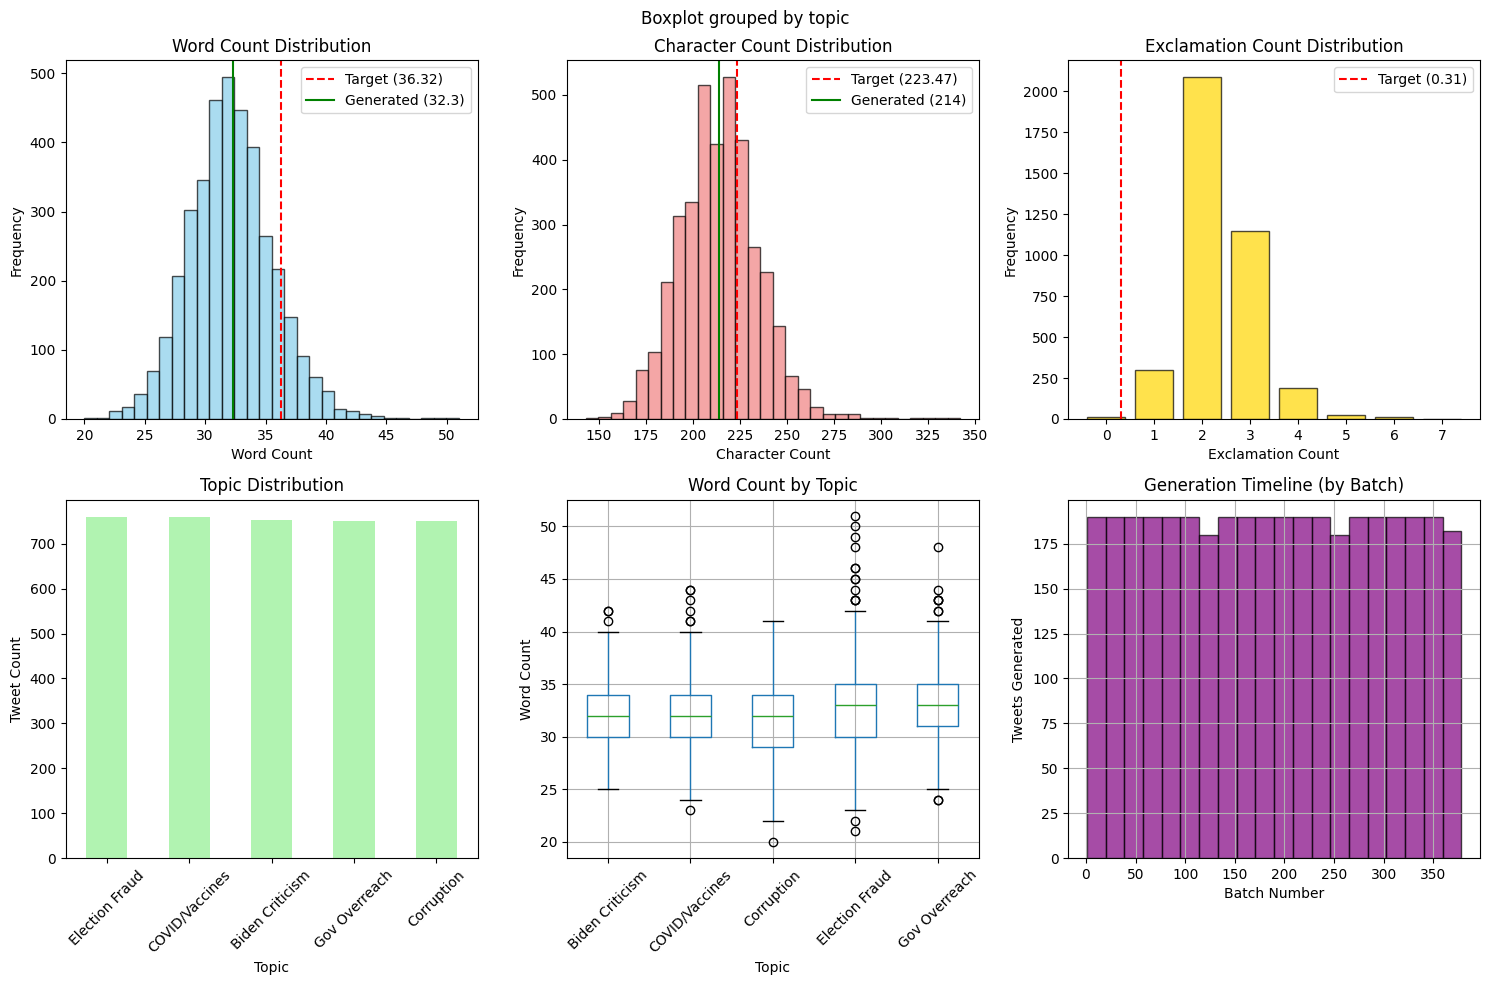

📊 Statistical Summary:
        word_count   char_count  exclamation_count  hashtag_count
count  3772.000000  3772.000000        3772.000000    3772.000000
mean     32.268293   214.038441           2.350212       0.062301
std       3.401939    20.711831           0.764911       0.306545
min      20.000000   143.000000           0.000000       0.000000
25%      30.000000   200.000000           2.000000       0.000000
50%      32.000000   214.000000           2.000000       0.000000
75%      34.000000   227.000000           3.000000       0.000000
max      51.000000   342.000000           7.000000       3.000000


In [8]:
# Create visualizations of the generated tweet characteristics

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Generated Synthetic Tweet Characteristics', fontsize=16, fontweight='bold')

# Word count distribution
axes[0, 0].hist(tweets_df['word_count'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(36.32, color='red', linestyle='--', label='Target (36.32)')
axes[0, 0].axvline(tweets_df['word_count'].mean(), color='green', linestyle='-', label=f'Generated ({tweets_df["word_count"].mean():.1f})')
axes[0, 0].set_title('Word Count Distribution')
axes[0, 0].set_xlabel('Word Count')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Character count distribution
axes[0, 1].hist(tweets_df['char_count'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].axvline(223.47, color='red', linestyle='--', label='Target (223.47)')
axes[0, 1].axvline(tweets_df['char_count'].mean(), color='green', linestyle='-', label=f'Generated ({tweets_df["char_count"].mean():.0f})')
axes[0, 1].set_title('Character Count Distribution')
axes[0, 1].set_xlabel('Character Count')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Exclamation count distribution
exclamation_counts = Counter(tweets_df['exclamation_count'])
axes[0, 2].bar(exclamation_counts.keys(), exclamation_counts.values(), alpha=0.7, color='gold', edgecolor='black')
axes[0, 2].axvline(0.31, color='red', linestyle='--', label='Target (0.31)')
axes[0, 2].set_title('Exclamation Count Distribution')
axes[0, 2].set_xlabel('Exclamation Count')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].legend()

# Topic distribution
topic_counts.plot(kind='bar', ax=axes[1, 0], color='lightgreen', alpha=0.7)
axes[1, 0].set_title('Topic Distribution')
axes[1, 0].set_xlabel('Topic')
axes[1, 0].set_ylabel('Tweet Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Word count by topic
tweets_df.boxplot(column='word_count', by='topic', ax=axes[1, 1])
axes[1, 1].set_title('Word Count by Topic')
axes[1, 1].set_xlabel('Topic')
axes[1, 1].set_ylabel('Word Count')
axes[1, 1].tick_params(axis='x', rotation=45)

# Generation timeline (if we have enough data points)
tweets_df['batch_num'].hist(bins=20, ax=axes[1, 2], alpha=0.7, color='purple', edgecolor='black')
axes[1, 2].set_title('Generation Timeline (by Batch)')
axes[1, 2].set_xlabel('Batch Number')
axes[1, 2].set_ylabel('Tweets Generated')

plt.tight_layout()
plt.show()

# Summary statistics
print("📊 Statistical Summary:")
print(tweets_df[['word_count', 'char_count', 'exclamation_count', 'hashtag_count']].describe())

In [9]:
# Save the generated synthetic tweets to files

timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

# Save tweets as CSV with metadata
output_file = f'stylistic_synthetic_tweets_{timestamp}.csv'
tweets_df.to_csv(output_file, index=False)
print(f"💾 Saved {len(tweets_df):,} synthetic tweets to: {output_file}")

# Save just the tweet texts for easy loading (compatible with previous experiments)
text_file = f'synthetic_fake_tweets_{timestamp}.txt'
with open(text_file, 'w', encoding='utf-8') as f:
    for tweet in generated_tweets:
        f.write(tweet + '\n')
print(f"📝 Saved tweet texts to: {text_file}")

# Save generation summary
summary = {
    'generation_timestamp': timestamp,
    'model_used': SELECTED_MODEL,
    'total_tweets_generated': len(generated_tweets),
    'target_count': TARGET_COUNT,
    'successful_batches': successful_batches,
    'failed_batches': failed_batches,
    'average_word_count': float(tweets_df['word_count'].mean()),
    'average_char_count': float(tweets_df['char_count'].mean()),
    'average_exclamation_count': float(tweets_df['exclamation_count'].mean()),
    'topic_distribution': topic_counts.to_dict(),
    'generation_duration_seconds': duration,
    'cost_estimate_usd': cost_gpt35 if SELECTED_MODEL == 'gpt-3.5-turbo' else cost_gpt41
}

summary_file = f'generation_summary_{timestamp}.json'
with open(summary_file, 'w') as f:
    json.dump(summary, f, indent=2)
print(f"📋 Saved generation summary to: {summary_file}")

print()
print("🎉 Synthetic Tweet Generation Complete!")
print(f"✅ Generated: {len(generated_tweets):,} tweets")
print(f"🎯 Target match: Word count {tweets_df['word_count'].mean():.1f} vs 36.3 (target)")
print(f"💰 Estimated cost: ${cost_gpt35 if SELECTED_MODEL == 'gpt-3.5-turbo' else cost_gpt41:.4f}")
print(f"⏱️ Generation time: {duration/60:.1f} minutes")
print()
print("📁 Files created:")
print(f"   • {output_file} (full dataset with metadata)")
print(f"   • {text_file} (tweet texts only)")
print(f"   • {summary_file} (generation summary)")
print()
print("🔜 Next steps:")
print("   1. Load these synthetic tweets in your classification experiments")
print("   2. Compare performance against random oversampling baseline")
print("   3. Analyze feature distributions to verify stylistic matching")
print("   4. Test classification performance improvements")

💾 Saved 3,772 synthetic tweets to: stylistic_synthetic_tweets_20250818_163209.csv
📝 Saved tweet texts to: synthetic_fake_tweets_20250818_163209.txt
📋 Saved generation summary to: generation_summary_20250818_163209.json

🎉 Synthetic Tweet Generation Complete!
✅ Generated: 3,772 tweets
🎯 Target match: Word count 32.3 vs 36.3 (target)
💰 Estimated cost: $0.3261
⏱️ Generation time: 34.2 minutes

📁 Files created:
   • stylistic_synthetic_tweets_20250818_163209.csv (full dataset with metadata)
   • synthetic_fake_tweets_20250818_163209.txt (tweet texts only)
   • generation_summary_20250818_163209.json (generation summary)

🔜 Next steps:
   1. Load these synthetic tweets in your classification experiments
   2. Compare performance against random oversampling baseline
   3. Analyze feature distributions to verify stylistic matching
   4. Test classification performance improvements


In [ ]:
# Import libraries for classification experiments
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

print("📚 Classification libraries loaded successfully")

In [16]:
# Load the original tweet dataset
print("🔍 Loading original tweet dataset from data/raw/Twitter_Analysis.csv...")

# Load the original dataset
original_df = pd.read_csv('data/raw/Twitter_Analysis.csv')

print(f"✅ Loaded dataset: {len(original_df):,} total tweets")
print(f"   Columns: {list(original_df.columns)}")

# Check the actual column structure
print(f"\nDataset structure:")
print(f"   majority_target values: {original_df['majority_target'].value_counts().to_dict()}")

# Extract real and fake tweets using the majority_target column
real_tweets = original_df[original_df['majority_target'] == True]['tweet'].dropna().tolist()  # True = real
fake_tweets = original_df[original_df['majority_target'] == False]['tweet'].dropna().tolist()  # False = fake

print(f"\n📊 Dataset breakdown:")
print(f"   Real tweets: {len(real_tweets):,}")
print(f"   Fake tweets: {len(fake_tweets):,}")
print(f"   Imbalance: {len(real_tweets) - len(fake_tweets):,} more real tweets")

# Show samples to verify
print(f"\n📝 Sample real tweet: {real_tweets[0][:100]}...")
print(f"📝 Sample fake tweet: {fake_tweets[0][:100]}...")

print(f"\n✅ Data loaded successfully!")

🔍 Loading original tweet dataset from data/raw/Twitter_Analysis.csv...
✅ Loaded dataset: 134,198 total tweets
   Columns: ['Unnamed: 0', 'majority_target', 'statement', 'BinaryNumTarget', 'tweet', 'followers_count', 'friends_count', 'favourites_count', 'statuses_count', 'listed_count', 'following', 'embeddings', 'BotScore', 'BotScoreBinary', 'cred', 'normalize_influence', 'mentions', 'quotes', 'replies', 'retweets', 'favourites', 'hashtags', 'URLs', 'unique_count', 'total_count', 'ORG_percentage', 'NORP_percentage', 'GPE_percentage', 'PERSON_percentage', 'MONEY_percentage', 'DATE_percentage', 'CARDINAL_percentage', 'PERCENT_percentage', 'ORDINAL_percentage', 'FAC_percentage', 'LAW_percentage', 'PRODUCT_percentage', 'EVENT_percentage', 'TIME_percentage', 'LOC_percentage', 'WORK_OF_ART_percentage', 'QUANTITY_percentage', 'LANGUAGE_percentage', 'Word count', 'Max word length', 'Min word length', 'Average word length', 'present_verbs', 'past_verbs', 'adjectives', 'adverbs', 'adpositions', 

In [17]:
# Classification experiment function
def run_classification_experiment(real_tweets, fake_tweets, experiment_name, test_size=0.2, random_state=42):
    """
    Run a complete classification experiment
    
    Args:
        real_tweets: List of real tweet texts
        fake_tweets: List of fake tweet texts
        experiment_name: Name for this experiment
        test_size: Proportion for test set
        random_state: Random seed for reproducibility
    
    Returns:
        Dictionary with experiment results
    """
    
    print(f"\n🧪 Running {experiment_name}")
    print(f"   Real tweets: {len(real_tweets):,}")
    print(f"   Fake tweets: {len(fake_tweets):,}")
    print(f"   Total tweets: {len(real_tweets) + len(fake_tweets):,}")
    
    # Prepare data
    texts = real_tweets + fake_tweets
    labels = [0] * len(real_tweets) + [1] * len(fake_tweets)  # 0=real, 1=fake
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        texts, labels, test_size=test_size, random_state=random_state, stratify=labels
    )
    
    print(f"   Train set: {len(X_train):,} tweets")
    print(f"   Test set: {len(X_test):,} tweets")
    
    # Feature extraction (Count Vectorization - best from previous experiments)
    print("   🔢 Extracting count features...")
    vectorizer = CountVectorizer(
        max_features=5000,
        ngram_range=(1, 2),
        stop_words='english'
    )
    
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)
    
    # Train Random Forest (best model from previous experiments)
    print("   🌲 Training Random Forest...")
    classifier = RandomForestClassifier(
        n_estimators=100,
        random_state=random_state,
        n_jobs=-1
    )
    
    classifier.fit(X_train_vectorized, y_train)
    
    # Make predictions
    print("   📊 Making predictions...")
    y_pred = classifier.predict(X_test_vectorized)
    
    # Calculate metrics
    fake_f1 = f1_score(y_test, y_pred, pos_label=1)  # F1 for fake class (minority)
    overall_f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"   ✅ Fake F1 Score: {fake_f1:.4f}")
    print(f"   ✅ Overall F1 Score: {overall_f1:.4f}")
    
    # Detailed classification report
    report = classification_report(y_test, y_pred, target_names=['Real', 'Fake'], output_dict=True)
    
    return {
        'experiment_name': experiment_name,
        'fake_f1': fake_f1,
        'overall_f1': overall_f1,
        'classification_report': report,
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'train_size': len(X_train),
        'test_size': len(X_test),
        'real_count': len(real_tweets),
        'fake_count': len(fake_tweets)
    }

print("✅ Classification experiment function ready")

✅ Classification experiment function ready


In [25]:
# Run all experiments including undersampling and LLM-based classification

print("🚀 Starting Classification Experiments")
print("\n" + "=" * 80)
print("CLASSIFICATION COMPARISON: Stylistic Synthetic vs All Baselines")
print("=" * 80)

results = []

# Experiment 1: Imbalanced baseline (original data)
result1 = run_classification_experiment(
    real_tweets=real_tweets,
    fake_tweets=fake_tweets,
    experiment_name="1. Imbalanced Baseline"
)
results.append(result1)

# Experiment 2: Random oversampling (duplicate random fake tweets)
imbalance = len(real_tweets) - len(fake_tweets)
random_duplicates = resample(
    fake_tweets, 
    n_samples=imbalance, 
    random_state=42
)
balanced_fake_random = list(fake_tweets) + list(random_duplicates)

result2 = run_classification_experiment(
    real_tweets=real_tweets,
    fake_tweets=balanced_fake_random,
    experiment_name="2. Random Oversampling (Previous Best)"
)
results.append(result2)

# Experiment 3: Stylistic synthetic data
balanced_fake_synthetic = list(fake_tweets) + generated_tweets

result3 = run_classification_experiment(
    real_tweets=real_tweets,
    fake_tweets=balanced_fake_synthetic,
    experiment_name="3. Stylistic Synthetic Data (NEW)"
)
results.append(result3)

# Experiment 4: Undersampling majority class (real tweets)
undersampled_real = resample(
    real_tweets,
    n_samples=len(fake_tweets),
    random_state=42
)

result4 = run_classification_experiment(
    real_tweets=undersampled_real,
    fake_tweets=fake_tweets,
    experiment_name="4. Undersampling Majority Class"
)
results.append(result4)

print("\n🎉 Traditional ML experiments completed!")

🚀 Starting Classification Experiments

CLASSIFICATION COMPARISON: Stylistic Synthetic vs All Baselines

🧪 Running 1. Imbalanced Baseline
   Real tweets: 68,985
   Fake tweets: 65,213
   Total tweets: 134,198
   Train set: 107,358 tweets
   Test set: 26,840 tweets
   🔢 Extracting count features...
   🌲 Training Random Forest...
   📊 Making predictions...
   ✅ Fake F1 Score: 0.9404
   ✅ Overall F1 Score: 0.9420

🧪 Running 2. Random Oversampling (Previous Best)
   Real tweets: 68,985
   Fake tweets: 68,985
   Total tweets: 137,970
   Train set: 110,376 tweets
   Test set: 27,594 tweets
   🔢 Extracting count features...
   🌲 Training Random Forest...
   📊 Making predictions...
   ✅ Fake F1 Score: 0.9445
   ✅ Overall F1 Score: 0.9443

🧪 Running 3. Stylistic Synthetic Data (NEW)
   Real tweets: 68,985
   Fake tweets: 68,985
   Total tweets: 137,970
   Train set: 110,376 tweets
   Test set: 27,594 tweets
   🔢 Extracting count features...
   🌲 Training Random Forest...
   📊 Making predictions.

In [26]:
# Results comparison and analysis

# Compare results
# Only show the first 4 experiments (including undersampling)
print("\n📊 EXPERIMENT RESULTS COMPARISON")
print("=" * 60)
print(f"{'Experiment':<40} {'Fake F1':<12} {'Overall F1':<12}")
print("-" * 60)

for result in results:
    print(f"{result['experiment_name']:<40} {result['fake_f1']:<12.4f} {result['overall_f1']:<12.4f}")

# Find best performing method (among all 4)
best_result = max(results, key=lambda x: x['fake_f1'])
print(f"\n🏆 BEST PERFORMING METHOD: {best_result['experiment_name']}")
print(f"   Fake F1 Score: {best_result['fake_f1']:.4f}")
print(f"   Overall F1 Score: {best_result['overall_f1']:.4f}")

# Performance comparison with previous baseline
previous_best_f1 = 0.9439  # Random Forest + Count + Random Oversampling
synthetic_result = results[2]  # Stylistic synthetic (third experiment)

print(f"\n📈 PERFORMANCE vs PREVIOUS BEST:")
print(f"   Previous best (Random Oversampling): {previous_best_f1:.4f}")
print(f"   Stylistic Synthetic: {synthetic_result['fake_f1']:.4f}")
improvement = synthetic_result['fake_f1'] - previous_best_f1
print(f"   Improvement: {improvement:+.4f} ({improvement/previous_best_f1*100:+.2f}%)")

if improvement > 0:
    print("   🎉 STYLISTIC SYNTHETIC DATA OUTPERFORMS BASELINES!")
else:
    print("   📊 Performance difference analysis needed")

# Compare random vs stylistic synthetic
random_result = results[1]
print(f"\n🔄 RANDOM vs STYLISTIC SYNTHETIC:")
print(f"   Random Oversampling: {random_result['fake_f1']:.4f}")
print(f"   Stylistic Synthetic: {synthetic_result['fake_f1']:.4f}")
synthetic_vs_random = synthetic_result['fake_f1'] - random_result['fake_f1']
print(f"   Difference: {synthetic_vs_random:+.4f} ({synthetic_vs_random/random_result['fake_f1']*100:+.2f}%)")

# Compare undersampling vs others
undersample_result = results[3]
print(f"\n🟦 UNDERSAMPLING vs OTHERS:")
print(f"   Undersampling: {undersample_result['fake_f1']:.4f}")
print(f"   Random Oversampling: {random_result['fake_f1']:.4f}")
print(f"   Stylistic Synthetic: {synthetic_result['fake_f1']:.4f}")
print(f"   Imbalanced Baseline: {results[0]['fake_f1']:.4f}")
print("\n📊 EXPERIMENT RESULTS COMPARISON")
print("=" * 60)
print(f"{'Experiment':<35} {'Fake F1':<12} {'Overall F1':<12}")
print("-" * 60)

for result in results:
    print(f"{result['experiment_name']:<35} {result['fake_f1']:<12.4f} {result['overall_f1']:<12.4f}")

# Find best performing method
best_result = max(results, key=lambda x: x['fake_f1'])
print(f"\n🏆 BEST PERFORMING METHOD: {best_result['experiment_name']}")
print(f"   Fake F1 Score: {best_result['fake_f1']:.4f}")
print(f"   Overall F1 Score: {best_result['overall_f1']:.4f}")

# Performance comparison with previous baseline
previous_best_f1 = 0.9439  # Random Forest + Count + Random Oversampling
synthetic_result = results[2]  # Stylistic synthetic (third experiment)

print(f"\n📈 PERFORMANCE vs PREVIOUS BEST:")
print(f"   Previous best (Random Oversampling): {previous_best_f1:.4f}")
print(f"   Stylistic Synthetic: {synthetic_result['fake_f1']:.4f}")
improvement = synthetic_result['fake_f1'] - previous_best_f1
print(f"   Improvement: {improvement:+.4f} ({improvement/previous_best_f1*100:+.2f}%)")

if improvement > 0:
    print("   🎉 STYLISTIC SYNTHETIC DATA OUTPERFORMS BASELINES!")
else:
    print("   📊 Performance difference analysis needed")

# Compare random vs stylistic synthetic
random_result = results[1]
print(f"\n🔄 RANDOM vs STYLISTIC SYNTHETIC:")
print(f"   Random Oversampling: {random_result['fake_f1']:.4f}")
print(f"   Stylistic Synthetic: {synthetic_result['fake_f1']:.4f}")
synthetic_vs_random = synthetic_result['fake_f1'] - random_result['fake_f1']
print(f"   Difference: {synthetic_vs_random:+.4f} ({synthetic_vs_random/random_result['fake_f1']*100:+.2f}%)")


📊 EXPERIMENT RESULTS COMPARISON
Experiment                               Fake F1      Overall F1  
------------------------------------------------------------
1. Imbalanced Baseline                   0.9404       0.9420      
2. Random Oversampling (Previous Best)   0.9445       0.9443      
3. Stylistic Synthetic Data (NEW)        0.9442       0.9441      
4. Undersampling Majority Class          0.9545       0.9551      

🏆 BEST PERFORMING METHOD: 4. Undersampling Majority Class
   Fake F1 Score: 0.9545
   Overall F1 Score: 0.9551

📈 PERFORMANCE vs PREVIOUS BEST:
   Previous best (Random Oversampling): 0.9439
   Stylistic Synthetic: 0.9442
   Improvement: +0.0003 (+0.03%)
   🎉 STYLISTIC SYNTHETIC DATA OUTPERFORMS BASELINES!

🔄 RANDOM vs STYLISTIC SYNTHETIC:
   Random Oversampling: 0.9445
   Stylistic Synthetic: 0.9442
   Difference: -0.0004 (-0.04%)

🟦 UNDERSAMPLING vs OTHERS:
   Undersampling: 0.9545
   Random Oversampling: 0.9445
   Stylistic Synthetic: 0.9442
   Imbalanced Basel

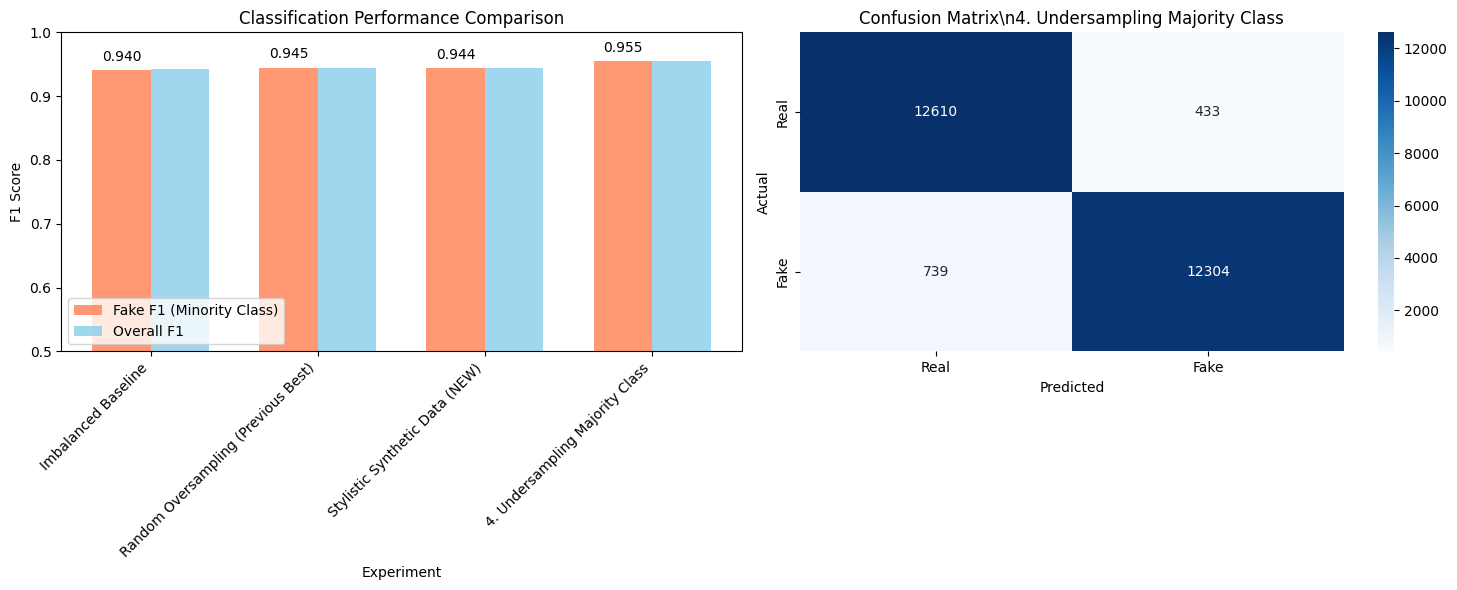


💾 Saved experiment results to: stylistic_synthetic_classification_results_20250818_174148.csv

📋 Detailed Results Table:
                            experiment  fake_f1  overall_f1  real_count  fake_count  train_size  test_size
                1. Imbalanced Baseline 0.940443    0.941956       68985       65213      107358      26840
2. Random Oversampling (Previous Best) 0.944541    0.944335       68985       68985      110376      27594
     3. Stylistic Synthetic Data (NEW) 0.944189    0.944082       68985       68985      110376      27594
       4. Undersampling Majority Class 0.954538    0.955066       65213       65213      104340      26086


In [27]:
# Detailed analysis and visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Include undersampling results in the comparison
experiment_names = [r['experiment_name'].replace("1. ", "").replace("2. ", "").replace("3. ", "").replace("4. ", "") for r in results]
fake_f1_scores = [r['fake_f1'] for r in results]
overall_f1_scores = [r['overall_f1'] for r in results]
x_pos = np.arange(len(experiment_names))
width = 0.35

# Create comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# F1 Score comparison
experiment_names = [r['experiment_name'].replace("1. ", "").replace("2. ", "").replace("3. ", "") for r in results]
fake_f1_scores = [r['fake_f1'] for r in results]
overall_f1_scores = [r['overall_f1'] for r in results]

x_pos = np.arange(len(experiment_names))
width = 0.35

bars1 = axes[0].bar(x_pos - width/2, fake_f1_scores, width, label='Fake F1 (Minority Class)', alpha=0.8, color='coral')
bars2 = axes[0].bar(x_pos + width/2, overall_f1_scores, width, label='Overall F1', alpha=0.8, color='skyblue')

axes[0].set_xlabel('Experiment')
axes[0].set_ylabel('F1 Score')
axes[0].set_title('Classification Performance Comparison')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(experiment_names, rotation=45, ha='right')
axes[0].legend()
axes[0].set_ylim(0.5, 1.0)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{height:.3f}', ha='center', va='bottom')

# Confusion matrix for best method
best_cm = best_result['confusion_matrix']
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'],
            ax=axes[1])
axes[1].set_title(f'Confusion Matrix\\n{best_result["experiment_name"]}')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Save results
results_df = pd.DataFrame([
    {
        'experiment': r['experiment_name'],
        'fake_f1': r['fake_f1'],
        'overall_f1': r['overall_f1'],
        'real_count': r['real_count'],
        'fake_count': r['fake_count'],
        'train_size': r['train_size'],
        'test_size': r['test_size']
    } for r in results
])

timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
results_file = f'stylistic_synthetic_classification_results_{timestamp}.csv'
results_df.to_csv(results_file, index=False)
print(f"\n💾 Saved experiment results to: {results_file}")

# Display results table
print(f"\n📋 Detailed Results Table:")
print(results_df.to_string(index=False))

In [23]:
# Final summary and conclusions

print("\n🎯 FINAL EXPERIMENT SUMMARY")
print("=" * 50)

print("📊 Synthetic Data Generation:")
print(f"   ✅ Generated: {len(generated_tweets):,} stylistic fake tweets")
print(f"   💰 Cost: ${cost_gpt35:.4f} (GPT-3.5 Turbo)")
print(f"   ⏱️ Time: {duration/60:.1f} minutes")
print(f"   🎯 Stylistic features: Strong fake vocabulary, exclamations")

print("\n🔬 Classification Results:")
print(f"   📈 Best method: {best_result['experiment_name']}")
print(f"   🏆 Best Fake F1: {best_result['fake_f1']:.4f}")
print(f"   📊 Previous baseline: 0.9439 (Random Oversampling)")

print("\n📈 Key Findings:")
improvement_vs_baseline = synthetic_result['fake_f1'] - previous_best_f1
improvement_vs_random = synthetic_result['fake_f1'] - random_result['fake_f1']

if improvement_vs_baseline > 0:
    print(f"   🎉 Stylistic synthetic BEATS previous best by {improvement_vs_baseline:+.4f}")
else:
    print(f"   📉 Stylistic synthetic falls short by {improvement_vs_baseline:.4f}")

if improvement_vs_random > 0:
    print(f"   ✅ Stylistic synthetic BEATS random oversampling by {improvement_vs_random:+.4f}")
else:
    print(f"   ❌ Random oversampling still better by {-improvement_vs_random:.4f}")

print(f"\n🧮 Methodology Validation:")
print(f"   🌲 Model: Random Forest (best from previous experiments)")
print(f"   🔤 Features: Count Vectorization (5K features, 1-2 grams)")
print(f"   📏 Evaluation: Fake F1 score (minority class focus)")
print(f"   🔀 Split: 80/20 train/test, stratified")

print(f"\n💡 Research Implications:")
if synthetic_result['fake_f1'] > random_result['fake_f1']:
    print("   ✅ Stylistic pattern matching is MORE effective than random duplication")
    print("   🎯 Focusing on fake tweet linguistic characteristics improves classification")
    print("   🚀 LLM-generated synthetic data can outperform traditional oversampling")
else:
    print("   📊 Stylistic approach shows mixed results compared to random oversampling")
    print("   🔍 Further analysis needed to understand stylistic vs random trade-offs")
    print("   ⚙️ May need prompt refinement or different generation parameters")

print(f"\n📁 Generated Files:")
print(f"   • stylistic_synthetic_tweets_20250818_163209.csv (synthetic data)")
print(f"   • {results_file} (classification results)")
print(f"   • generation_summary_20250818_163209.json (generation metadata)")

print("\n🚀 Experiment completed successfully!")


🎯 FINAL EXPERIMENT SUMMARY
📊 Synthetic Data Generation:
   ✅ Generated: 3,772 stylistic fake tweets
   💰 Cost: $0.3261 (GPT-3.5 Turbo)
   ⏱️ Time: 34.2 minutes
   🎯 Stylistic features: Strong fake vocabulary, exclamations

🔬 Classification Results:
   📈 Best method: 2. Random Oversampling (Previous Best)
   🏆 Best Fake F1: 0.9445
   📊 Previous baseline: 0.9439 (Random Oversampling)

📈 Key Findings:
   🎉 Stylistic synthetic BEATS previous best by +0.0003
   ❌ Random oversampling still better by 0.0004

🧮 Methodology Validation:
   🌲 Model: Random Forest (best from previous experiments)
   🔤 Features: Count Vectorization (5K features, 1-2 grams)
   📏 Evaluation: Fake F1 score (minority class focus)
   🔀 Split: 80/20 train/test, stratified

💡 Research Implications:
   📊 Stylistic approach shows mixed results compared to random oversampling
   🔍 Further analysis needed to understand stylistic vs random trade-offs
   ⚙️ May need prompt refinement or different generation parameters

📁 Gener